In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
# import math

C:\Users\Su\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
C:\Users\Su\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages


In [2]:
from matplotlib import font_manager, rc
import matplotlib
import platform

# 한글꺠짐 처리(windows, mac)
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
# 차트에 마이너스 부분이 깨질때 처리
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [3]:
import warnings

warnings.filterwarnings(action='ignore')

In [4]:
train = pd.read_csv('../data/train_df_errno2.csv')
test = pd.read_csv('../data/test_df2.csv')

train.shape, test.shape

((2896, 23), (1008, 21))

In [5]:
pd.set_option('display.max_columns', 100)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2896 entries, 0 to 2895
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   단지코드        2896 non-null   object 
 1   총세대수        2896 non-null   int64  
 2   임대건물구분      2896 non-null   object 
 3   지역          2896 non-null   object 
 4   공급유형        2896 non-null   object 
 5   전용면적        2896 non-null   float64
 6   전용면적별세대수    2896 non-null   int64  
 7   공가수         2896 non-null   float64
 8   자격유형        2896 non-null   object 
 9   임대보증금       2327 non-null   object 
 10  임대료         2327 non-null   object 
 11  10분내지하철수    2896 non-null   float64
 12  10분내버스정류장수  2896 non-null   float64
 13  단지내주차면수     2896 non-null   float64
 14  단지코드_Type   2896 non-null   float64
 15  임대건물구분_lbl  2896 non-null   int64  
 16  지역_lbl      2896 non-null   int64  
 17  공급유형_lbl    2896 non-null   int64  
 18  자격유형_lbl    2896 non-null   int64  
 19  단지코드_lbl    2896 non-null  

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   단지코드        1008 non-null   object 
 1   총세대수        1008 non-null   int64  
 2   임대건물구분      1008 non-null   object 
 3   지역          1008 non-null   object 
 4   공급유형        1008 non-null   object 
 5   전용면적        1008 non-null   float64
 6   전용면적별세대수    1008 non-null   int64  
 7   공가수         1008 non-null   float64
 8   자격유형        1008 non-null   object 
 9   임대보증금       828 non-null    object 
 10  임대료         828 non-null    object 
 11  10분내지하철수    1008 non-null   float64
 12  10분내버스정류장수  1008 non-null   float64
 13  단지내주차면수     1008 non-null   float64
 14  단지코드_Type   1008 non-null   float64
 15  임대건물구분_lbl  1008 non-null   int64  
 16  지역_lbl      1008 non-null   int64  
 17  공급유형_lbl    1008 non-null   int64  
 18  자격유형_lbl    1008 non-null   int64  
 19  단지코드_lbl    1008 non-null  

In [8]:
train

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수,등록차량수,log_등록차량수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0,3.0,1,1,1,1,492,1,205.0,5.327876
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0,3.0,1,1,1,1,492,1,205.0,5.327876
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0,3.0,1,1,1,1,492,1,205.0,5.327876
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0,3.0,1,1,1,1,492,1,205.0,5.327876
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0,3.0,1,1,1,1,492,1,205.0,5.327876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2891,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000,116090,0.0,1.0,166.0,3.0,1,5,1,1,501,0,146.0,4.990433
2892,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000,142310,0.0,1.0,166.0,3.0,1,5,1,1,501,0,146.0,4.990433
2893,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000,142310,0.0,1.0,166.0,3.0,1,5,1,1,501,0,146.0,4.990433
2894,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000,142310,0.0,1.0,166.0,3.0,1,5,1,1,501,0,146.0,4.990433


In [9]:
all_df = pd.concat([train, test], join='inner', ignore_index=True)
all_df.shape

(3904, 21)

In [10]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   단지코드        3904 non-null   object 
 1   총세대수        3904 non-null   int64  
 2   임대건물구분      3904 non-null   object 
 3   지역          3904 non-null   object 
 4   공급유형        3904 non-null   object 
 5   전용면적        3904 non-null   float64
 6   전용면적별세대수    3904 non-null   int64  
 7   공가수         3904 non-null   float64
 8   자격유형        3904 non-null   object 
 9   임대보증금       3155 non-null   object 
 10  임대료         3155 non-null   object 
 11  10분내지하철수    3904 non-null   float64
 12  10분내버스정류장수  3904 non-null   float64
 13  단지내주차면수     3904 non-null   float64
 14  단지코드_Type   3904 non-null   float64
 15  임대건물구분_lbl  3904 non-null   int64  
 16  지역_lbl      3904 non-null   int64  
 17  공급유형_lbl    3904 non-null   int64  
 18  자격유형_lbl    3904 non-null   int64  
 19  단지코드_lbl    3904 non-null  

In [11]:
all_df.isna().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금         749
임대료           749
10분내지하철수        0
10분내버스정류장수      0
단지내주차면수         0
단지코드_Type       0
임대건물구분_lbl      0
지역_lbl          0
공급유형_lbl        0
자격유형_lbl        0
단지코드_lbl        0
qcut_총세대수       0
dtype: int64

In [12]:
# 임대보증금, 임대료와 관련이 있는 피처를 찾기 위해 결측치 버림
# 임대보증금, 임대료의 값이 '-'인 경우를 제외한 df 생성 temp_df1
# 임대보증금, 임대료의 값이 '-'인 경우를 0으로 치환한 df 생성 temp_df2

temp_df1 = all_df.dropna(subset=['임대보증금', '임대료'])
temp_df1 = temp_df1[ (temp_df1['임대보증금'] != '-') & (temp_df1['임대료'] != '-') ]

temp_df1['임대보증금'] = temp_df1['임대보증금'].astype(int)
temp_df1['임대료'] = temp_df1['임대료'].astype(int)

temp_df2 = all_df.dropna(subset=['임대보증금', '임대료'])
temp_df2.loc[ temp_df2['임대보증금'] == '-', '임대보증금' ] = 0
temp_df2.loc[ temp_df2['임대료'] == '-', '임대료' ] = 0

temp_df2['임대보증금'] = temp_df2['임대보증금'].astype(int)
temp_df2['임대료'] = temp_df2['임대료'].astype(int)

In [73]:
temp_df1['임대건물구분'].unique()

array(['아파트'], dtype=object)

In [13]:
# 임대보증금, 임대료의 상관관계 확인
temp_df1.corr()[['임대보증금', '임대료']]

,임대보증금,임대료
총세대수,0.109937,0.103770
전용면적,0.511991,0.720872
전용면적별세대수,-0.092141,-0.031308
공가수,0.088114,-0.157846
임대보증금,1.000000,0.516733
임대료,0.516733,1.000000
10분내지하철수,0.036878,0.068610
10분내버스정류장수,0.124462,0.070836
단지내주차면수,0.258849,0.299199
단지코드_Type,-0.048894,0.085303


In [14]:
temp_df2.corr()[['임대보증금', '임대료']]

,임대보증금,임대료
총세대수,0.113191,0.094205
전용면적,0.481889,0.717161
전용면적별세대수,-0.094079,-0.032282
공가수,0.061411,-0.163042
임대보증금,1.000000,0.437005
임대료,0.437005,1.000000
10분내지하철수,0.028155,0.072336
10분내버스정류장수,0.107087,0.072495
단지내주차면수,0.262169,0.282598
단지코드_Type,-0.028787,0.091140


Text(0.5, 1.0, '임대보증금, 임대료 0으로 전환')

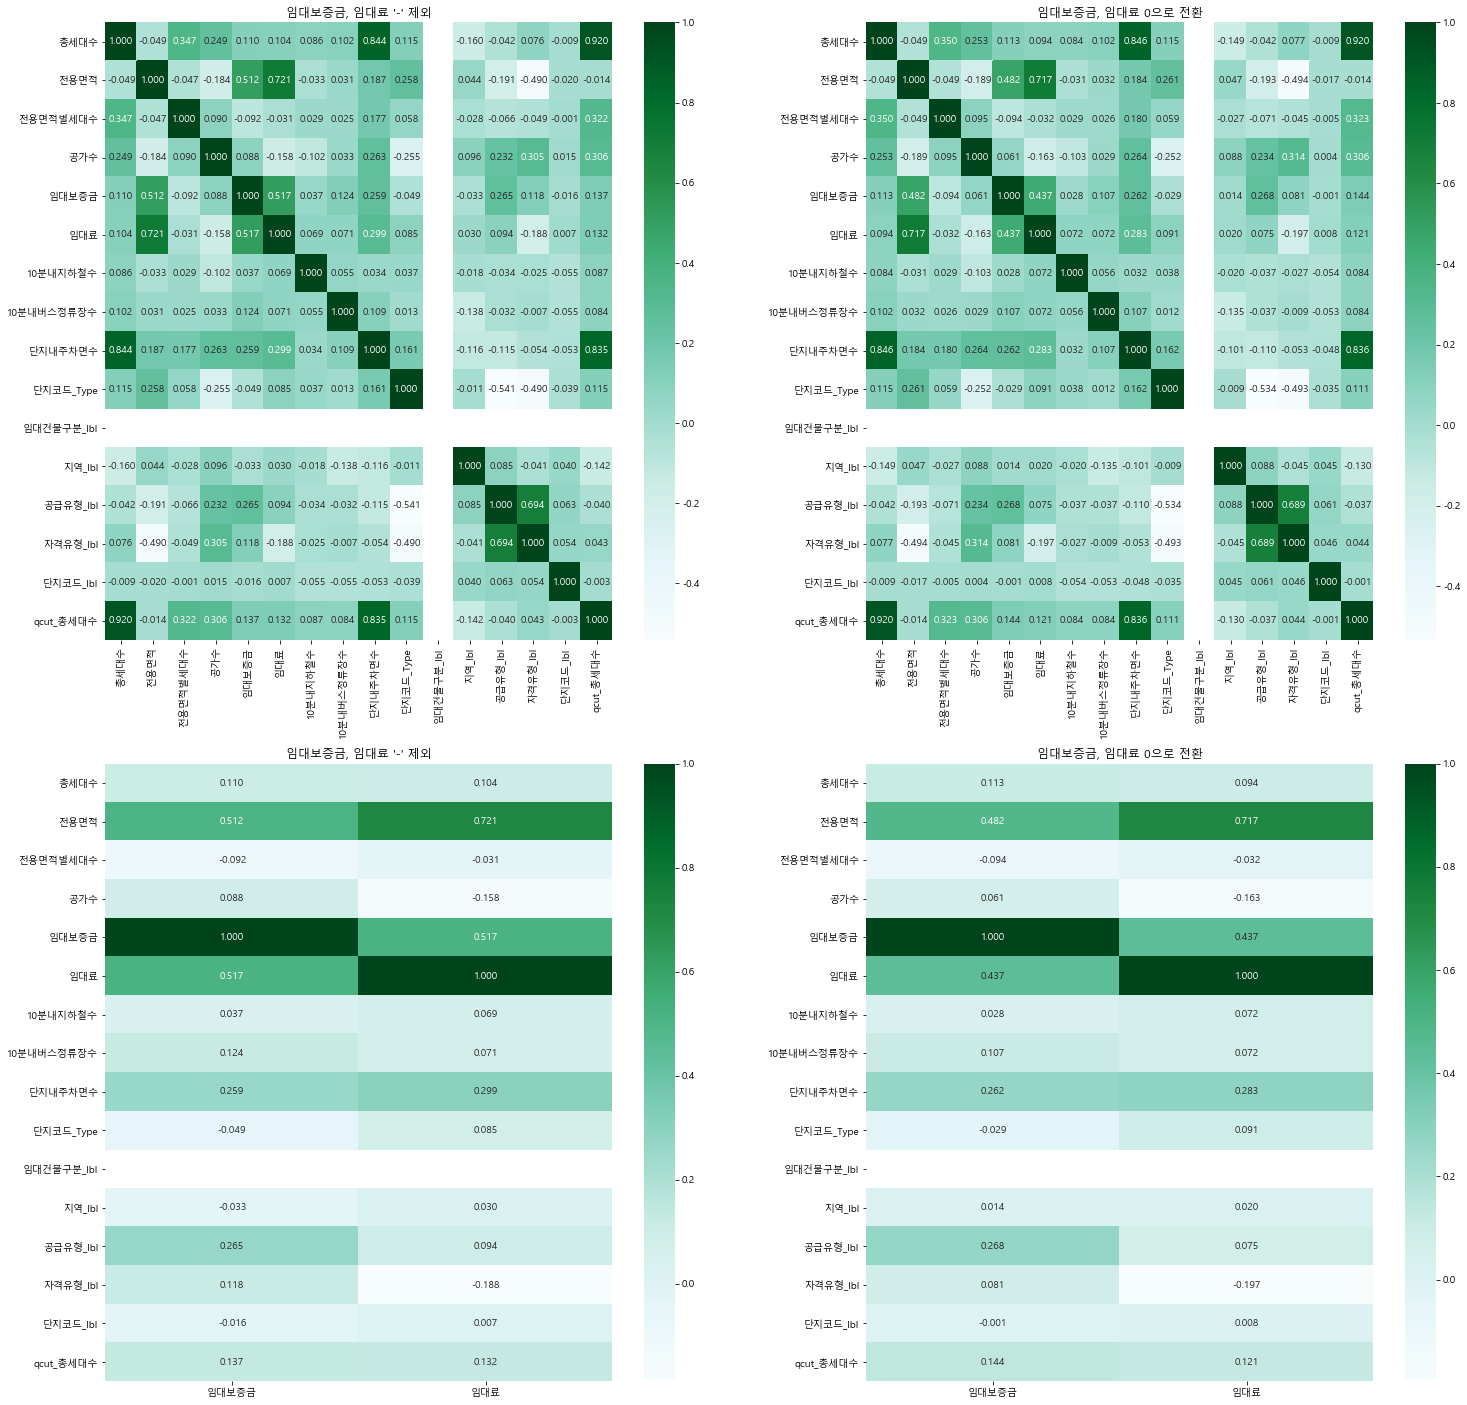

In [15]:
# 임대보증금, 임대료의 상관관계 확인
plt.figure(figsize=(25, 25))
plt.subplot(2, 2, 1)
sns.heatmap(temp_df1.corr(), annot=True, fmt='.3f', cmap='BuGn')
plt.title("임대보증금, 임대료 '-' 제외")

plt.subplot(2, 2, 2)
sns.heatmap(temp_df2.corr(), annot=True, fmt='.3f', cmap='BuGn')
plt.title("임대보증금, 임대료 0으로 전환")

plt.subplot(2, 2, 3)
sns.heatmap(temp_df1.corr()[['임대보증금', '임대료']], annot=True, fmt='.3f', cmap='BuGn')
plt.title("임대보증금, 임대료 '-' 제외")

plt.subplot(2, 2, 4)
sns.heatmap(temp_df2.corr()[['임대보증금', '임대료']], annot=True, fmt='.3f', cmap='BuGn')
plt.title("임대보증금, 임대료 0으로 전환")

In [16]:
check = all_df[all_df['임대보증금'].isna()].index == all_df[all_df['임대료'].isna()].index
np.unique(check)

array([ True])

In [17]:
all_df.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0,3.0,1,1,1,1,492,1
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0,3.0,1,1,1,1,492,1
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0,3.0,1,1,1,1,492,1
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0,3.0,1,1,1,1,492,1
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0,3.0,1,1,1,1,492,1


In [18]:
null_df = all_df[all_df['임대보증금'].isna()]

In [19]:
for i in null_df.columns :
    print(f'{i}의 유니크값\n{null_df[i].unique()}')
    print()

단지코드의 유니크값
['C1925' 'C1874' 'C2416' 'C2621' 'C1616' 'C1704' 'C2258' 'C2038' 'C1859'
 'C1722' 'C2190' 'C1476' 'C1983' 'C2135' 'C2034' 'C1109' 'C2289' 'C2597'
 'C2310' 'C2132' 'C1439' 'C1899' 'C1056' 'C2644' 'C1206' 'C1775' 'C1790'
 'C2109' 'C1698' 'C1004' 'C1875' 'C2212' 'C2571' 'C1350' 'C1006' 'C2676'
 'C2177' 'C2033' 'C1812' 'C2253' 'C1729']

총세대수의 유니크값
[ 601  619  560 1396 1507  639  965  785 2424  809 1013  453  903 1116
 1486 1957 1527 1005 1988 2428 1755  451  410  779  755  711  657  495
  460  521 1003  697  481 1401 1505 2572 1245 1400 1021 1161  627]

임대건물구분의 유니크값
['상가' '아파트']

지역의 유니크값
['강원도' '충청남도' '경상남도' '대전광역시' '부산광역시' '제주특별자치도' '울산광역시']

공급유형의 유니크값
['임대상가' '공공분양' '영구임대']

전용면적의 유니크값
[ 32.1   72.16  12.62  17.4   22.89  23.13  23.25  27.75  28.19  34.8
  42.35  42.4   49.37  55.17  55.5   19.69  27.12  32.54  36.43  46.89
  49.99  51.14 317.17  31.84  63.68 137.49  38.    37.26  37.41  37.49
  37.95  38.04  39.33  54.51  54.61  54.91  75.98 109.11 583.4  126.65
  19.    14

- 임대보증금과 임대료의 NaN 행은 같다
- 자격유형 'D' 의 임대보증금 및 임대료는 모두 NaN이다
- 임대상가의 임대보증금, 임대료는 모두 NaN이다.

In [20]:
# 임대보증금과 임대료의 NaN 행은 같다
check = all_df[all_df['임대보증금'].isna()].index == all_df[all_df['임대료'].isna()].index
np.unique(check)

array([ True])

In [21]:
# 자격유형 'D' 의 임대보증금 및 임대료는 모두 NaN이다
check = null_df.index == all_df[all_df['자격유형'] == 'D'].index
np.unique(check)

array([ True])

In [22]:
null_df.index

Int64Index([  80,   81,   82,   83,   93,   94,   95,   96,   97,   98,
            ...
            3219, 3220, 3221, 3222, 3223, 3224, 3225, 3226, 3227, 3228],
           dtype='int64', length=749)

In [23]:
all_df[all_df['공급유형'] == '임대상가'].index

Int64Index([  80,   81,   82,   83,   93,   94,   95,   96,   97,   98,
            ...
            3219, 3220, 3221, 3222, 3223, 3224, 3225, 3226, 3227, 3228],
           dtype='int64', length=739)

In [24]:
# 임대상가의 임대보증금, 임대료는 모두 NaN이다.
all_df[all_df['공급유형'] == '임대상가'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739 entries, 80 to 3228
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   단지코드        739 non-null    object 
 1   총세대수        739 non-null    int64  
 2   임대건물구분      739 non-null    object 
 3   지역          739 non-null    object 
 4   공급유형        739 non-null    object 
 5   전용면적        739 non-null    float64
 6   전용면적별세대수    739 non-null    int64  
 7   공가수         739 non-null    float64
 8   자격유형        739 non-null    object 
 9   임대보증금       0 non-null      object 
 10  임대료         0 non-null      object 
 11  10분내지하철수    739 non-null    float64
 12  10분내버스정류장수  739 non-null    float64
 13  단지내주차면수     739 non-null    float64
 14  단지코드_Type   739 non-null    float64
 15  임대건물구분_lbl  739 non-null    int64  
 16  지역_lbl      739 non-null    int64  
 17  공급유형_lbl    739 non-null    int64  
 18  자격유형_lbl    739 non-null    int64  
 19  단지코드_lbl    739 non-null   

In [25]:
all_df[ all_df['공급유형'] == '임대상가' ]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
80,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,1.0,2,5,4,4,294,1
81,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,1.0,2,5,4,4,294,1
82,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,1.0,2,5,4,4,294,1
83,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,NaN,NaN,0.0,4.0,117.0,1.0,2,5,4,4,294,1
93,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,NaN,NaN,0.0,2.0,97.0,3.0,2,7,4,4,278,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224,C1729,627,상가,강원도,임대상가,32.46,1,0.0,D,NaN,NaN,0.0,5.0,131.0,3.0,2,5,4,4,228,1
3225,C1729,627,상가,강원도,임대상가,34.86,1,0.0,D,NaN,NaN,0.0,5.0,131.0,3.0,2,5,4,4,228,1
3226,C1729,627,상가,강원도,임대상가,35.76,1,0.0,D,NaN,NaN,0.0,5.0,131.0,3.0,2,5,4,4,228,1
3227,C1729,627,상가,강원도,임대상가,50.08,1,0.0,D,NaN,NaN,0.0,5.0,131.0,3.0,2,5,4,4,228,1


In [26]:
all_df[ all_df['자격유형'] == 'A' ].describe()

,총세대수,전용면적,전용면적별세대수,공가수,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
count,2321.000000,2321.000000,2321.000000,2321.000000,2321.000000,2321.000000,2321.000000,2321.000000,2321.0,2321.000000,2321.000000,2321.0,2321.000000,2321.000000
mean,748.010771,47.670069,120.587247,13.180956,0.127531,3.997816,677.833692,2.952176,1.0,6.414477,1.468333,1.0,273.730720,1.685480
std,354.675357,11.155681,114.285703,8.836542,0.395149,3.636678,356.015183,0.273618,0.0,4.427251,1.318293,0.0,162.610679,1.301259
min,70.000000,21.970000,2.000000,0.000000,0.000000,0.000000,27.000000,1.000000,1.0,1.000000,1.000000,1.0,0.000000,0.000000
25%,492.000000,39.630000,42.000000,6.000000,0.000000,2.000000,402.000000,3.000000,1.0,3.000000,1.000000,1.0,130.000000,1.000000
50%,680.000000,46.900000,87.000000,13.000000,0.000000,3.000000,611.000000,3.000000,1.0,5.000000,1.000000,1.0,270.000000,2.000000
75%,976.000000,51.930000,160.000000,19.000000,0.000000,5.000000,884.000000,3.000000,1.0,11.000000,1.000000,1.0,419.000000,3.000000
max,1974.000000,84.990000,960.000000,39.000000,3.000000,50.000000,1756.000000,3.000000,1.0,16.000000,10.000000,1.0,560.000000,4.000000


In [27]:
all_df[ all_df['자격유형'] == 'C' ].describe()

,총세대수,전용면적,전용면적별세대수,공가수,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.0,128.000000,128.0,128.0,128.000000,128.000000
mean,1066.007812,30.382969,303.257812,8.843750,0.328125,4.000000,246.890625,2.828125,1.0,5.304688,3.0,3.0,312.195312,2.492188
std,588.548736,6.162992,307.883843,10.850768,0.534029,2.377718,179.487645,0.548575,0.0,3.494785,0.0,0.0,145.987922,1.441762
min,90.000000,22.860000,4.000000,0.000000,0.000000,1.000000,30.000000,1.000000,1.0,1.000000,3.0,3.0,2.000000,0.000000
25%,627.000000,26.370000,120.000000,1.000000,0.000000,2.000000,131.000000,3.000000,1.0,2.000000,3.0,3.0,228.000000,1.000000
50%,984.000000,26.455000,239.000000,3.000000,0.000000,4.000000,187.000000,3.000000,1.0,5.000000,3.0,3.0,324.000000,3.000000
75%,1400.000000,31.320000,360.000000,12.250000,1.000000,5.000000,279.500000,3.000000,1.0,8.000000,3.0,3.0,399.750000,4.000000
max,2572.000000,52.740000,1865.000000,38.000000,2.000000,12.000000,1192.000000,3.000000,1.0,14.000000,3.0,3.0,555.000000,4.000000


In [28]:
temp_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3128 entries, 0 to 3903
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   단지코드        3128 non-null   object 
 1   총세대수        3128 non-null   int64  
 2   임대건물구분      3128 non-null   object 
 3   지역          3128 non-null   object 
 4   공급유형        3128 non-null   object 
 5   전용면적        3128 non-null   float64
 6   전용면적별세대수    3128 non-null   int64  
 7   공가수         3128 non-null   float64
 8   자격유형        3128 non-null   object 
 9   임대보증금       3128 non-null   int32  
 10  임대료         3128 non-null   int32  
 11  10분내지하철수    3128 non-null   float64
 12  10분내버스정류장수  3128 non-null   float64
 13  단지내주차면수     3128 non-null   float64
 14  단지코드_Type   3128 non-null   float64
 15  임대건물구분_lbl  3128 non-null   int64  
 16  지역_lbl      3128 non-null   int64  
 17  공급유형_lbl    3128 non-null   int64  
 18  자격유형_lbl    3128 non-null   int64  
 19  단지코드_lbl    3128 non-null  

In [29]:
temp_df1.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수',
       '단지코드_Type', '임대건물구분_lbl', '지역_lbl', '공급유형_lbl', '자격유형_lbl', '단지코드_lbl',
       'qcut_총세대수'],
      dtype='object')

In [30]:
temp_df1['임대보증금'].min(), temp_df1['임대보증금'].max()

(2249000, 194080000)

In [31]:
temp_df1['임대료'].min(), temp_df1['임대료'].max()

(16650, 1058030)

In [32]:
temp_df1.describe()

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
count,3128.000000,3128.000000,3128.000000,3128.000000,3.128000e+03,3.128000e+03,3128.000000,3128.000000,3128.000000,3128.000000,3128.0,3128.000000,3128.000000,3128.000000,3128.000000,3128.000000
mean,782.005115,43.936378,126.084399,14.601023,2.571686e+07,1.886398e+05,0.132673,4.016922,654.578325,2.814258,1.0,6.237852,2.253517,2.850064,279.600064,1.761189
std,423.327731,12.574982,135.331856,10.517959,1.845406e+07,1.202393e+05,0.394210,3.855153,377.492482,0.568067,0.0,4.382534,2.538477,3.491352,162.105276,1.359872
min,26.000000,16.020000,2.000000,0.000000,2.249000e+06,1.665000e+04,0.000000,0.000000,13.000000,1.000000,1.0,1.000000,1.000000,1.000000,0.000000,0.000000
25%,479.500000,36.630000,39.000000,7.000000,1.441800e+07,1.107900e+05,0.000000,2.000000,372.000000,3.000000,1.0,3.000000,1.000000,1.000000,134.000000,1.000000
50%,708.000000,46.480000,88.000000,13.000000,2.050250e+07,1.573000e+05,0.000000,3.000000,593.500000,3.000000,1.0,5.000000,1.000000,1.000000,278.000000,2.000000
75%,1003.000000,51.712500,166.250000,21.000000,3.195800e+07,2.320000e+05,0.000000,5.000000,879.000000,3.000000,1.0,11.000000,2.000000,3.000000,426.000000,3.000000
max,2572.000000,84.990000,1865.000000,55.000000,1.940800e+08,1.058030e+06,3.000000,50.000000,1798.000000,3.000000,1.0,16.000000,10.000000,15.000000,560.000000,4.000000


In [33]:
temp_df1.corr()['임대보증금'].sort_values()

전용면적별세대수     -0.092141
단지코드_Type    -0.048894
지역_lbl       -0.033143
단지코드_lbl     -0.016044
10분내지하철수      0.036878
공가수           0.088114
총세대수          0.109937
자격유형_lbl      0.117971
10분내버스정류장수    0.124462
qcut_총세대수     0.136655
단지내주차면수       0.258849
공급유형_lbl      0.264547
전용면적          0.511991
임대료           0.516733
임대보증금         1.000000
임대건물구분_lbl         NaN
Name: 임대보증금, dtype: float64

In [34]:
temp_df1['임대건물구분_lbl'].unique()

array([1], dtype=int64)

In [35]:
def rfr(X_train1, y_train1, X_train2, y_train2) :
    model = RandomForestRegressor(n_jobs=-1)
    model.fit(X_train1, y_train1)

    print("temp1_학습(score) :", model.score(X_train1, y_train1) ) # 결정계수
    print("temp1_테스트(score) :", model.score(X_test1, y_test1) ) # 결정계수

    model.fit(X_train2, y_train2)

    print("temp2_학습(score) :", model.score(X_train2, y_train2) ) # 결정계수
    print("temp2_테스트(score) :", model.score(X_test2, y_test2) ) # 결정계수

In [51]:
def model_test(sel, pred) :
    X1 = temp_df1[sel]
    y1 = temp_df1[pred]

    X2 = temp_df2[sel]
    y2 = temp_df2[pred]

    X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, random_state=0)
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=0)
    
    print('RandomForestRegressor')
    model = RandomForestRegressor(n_jobs=-1)
    model.fit(X_train1, y_train1)

    print("temp1_학습(score) :", model.score(X_train1, y_train1) ) # 결정계수
    print("temp1_테스트(score) :", model.score(X_test1, y_test1) ) # 결정계수

    model.fit(X_train2, y_train2)

    print("temp2_학습(score) :", model.score(X_train2, y_train2) ) # 결정계수
    print("temp2_테스트(score) :", model.score(X_test2, y_test2) ) # 결정계수
    
    model_RF = RandomForestRegressor(n_estimators = 1000,
                                     random_state=0, n_jobs=-1)
    model_RF.fit(X_train1, y_train1)

    # neg_mean_absolute_error
    score = cross_val_score(model_RF, X_train1, y_train1,
                            cv=5, scoring="neg_mean_absolute_error") # neg_mean_squared_error
    m_score = np.abs(score.mean())

    print("RandomForestRegressor Score : {}".format(m_score))  # 점수

    model_RF.fit(X_train2, y_train2)

    # neg_mean_absolute_error
    score = cross_val_score(model_RF, X_train2, y_train2,
                            cv=5, scoring="neg_mean_absolute_error") # neg_mean_squared_error
    m_score = np.abs(score.mean())

    print("RandomForestRegressor Score : {}".format(m_score))  # 점수
    print('\n')
    
    
    print('GradientBoostingRegressor')
    model = GradientBoostingRegressor()
    model.fit(X_train1, y_train1)

    print("temp1_학습(score) :", model.score(X_train1, y_train1) ) # 결정계수
    print("temp1_테스트(score) :", model.score(X_test1, y_test1) ) # 결정계수

    model.fit(X_train2, y_train2)

    print("temp2_학습(score) :", model.score(X_train2, y_train2) ) # 결정계수
    print("temp2_테스트(score) :", model.score(X_test2, y_test2) ) # 결정계수    

    model = GradientBoostingRegressor(n_estimators = 1000,
                                      random_state=0)
    model.fit(X_train1, y_train1)
    score = cross_val_score(model, X_train1, y_train1,
                            cv=5, scoring="neg_mean_absolute_error") # neg_mean_squared_error
    m_score = np.abs(score.mean())

    print("GradientBoostingRegressor Score : {}".format(m_score))  # 점수

    model.fit(X_train2, y_train2)
    score = cross_val_score(model, X_train2, y_train2,
                            cv=5, scoring="neg_mean_absolute_error") # neg_mean_squared_error
    m_score = np.abs(score.mean())

    print("GradientBoostingRegressor Score : {}".format(m_score))  # 점수
    print('\n')
    
    
    print('LGBMRegressor')
    hyperparameters = {'boosting_type': 'gbdt',
                   'colsample_bytree': 0.7250136792694301,
                   'is_unbalance': False,
                   'learning_rate': 0.013,
                   'min_child_samples': 20,
                   'num_leaves': 56,
                   'subsample': 0.5233384321711397,
                   'n_estimators': 1000}

    m_lgbm = lgb.LGBMRegressor(**hyperparameters)
    m_lgbm.fit(X_train1, y_train1)

    print("temp1_학습(score) :", m_lgbm.score(X_train1, y_train1) ) # 결정계수
    print("temp1_테스트(score) :", m_lgbm.score(X_test1, y_test1) ) # 결정계수

    m_lgbm.fit(X_train2, y_train2)

    print("temp2_학습(score) :", m_lgbm.score(X_train2, y_train2) ) # 결정계수
    print("temp2_테스트(score) :", m_lgbm.score(X_test2, y_test2) ) # 결정계수
    
    m_lgbm1 = lgb.LGBMRegressor(**hyperparameters)
    m_lgbm1.fit(X_train1, y_train1)
    score = cross_val_score(m_lgbm1, X_train1, y_train1,
                            cv=5, scoring="neg_mean_absolute_error")

    m_score = np.abs(score.mean())  # 절대값
    print("LightGBM Score : {}".format(m_score))  # 점수

    m_lgbm1.fit(X_train2, y_train2)
    score = cross_val_score(m_lgbm1, X_train2, y_train2,
                            cv=5, scoring="neg_mean_absolute_error")

    m_score = np.abs(score.mean())  # 절대값
    print("LightGBM Score : {}".format(m_score))  # 점수
    print('\n')
    
    
#     print('CatBoostRegressor')
#     model = CatBoostRegressor(loss_function='MAE',
#                           n_estimators=500, 
#                           learning_rate=0.05, 
#                           random_state=42)

#     model.fit(X_train1, y_train1)    
    
#     print("temp1_학습(score) :", model.score(X_train1, y_train1) ) # 결정계수
#     print("temp1_테스트(score) :", model.score(X_test1, y_test1) ) # 결정계수
    
#     model.fit(X_train2, y_train2)    

#     print("temp2_학습(score) :", model.score(X_train2, y_train2) ) # 결정계수
#     print("temp2_테스트(score) :", model.score(X_test2, y_test2) ) # 결정계수
    
    
    

In [46]:
temp_df1.corr()['임대보증금'].sort_values()
# temp_df1.corr()['임대보증금']

전용면적별세대수     -0.092141
단지코드_Type    -0.048894
지역_lbl       -0.033143
단지코드_lbl     -0.016044
10분내지하철수      0.036878
공가수           0.088114
총세대수          0.109937
자격유형_lbl      0.117971
10분내버스정류장수    0.124462
qcut_총세대수     0.136655
단지내주차면수       0.258849
공급유형_lbl      0.264547
전용면적          0.511991
임대료           0.516733
임대보증금         1.000000
임대건물구분_lbl         NaN
Name: 임대보증금, dtype: float64

In [110]:
# sel = ['전용면적', '10분내버스정류장수', '단지내주차면수', '공급유형_lbl', 'qcut_총세대수']


# sel = ['총세대수', '전용면적', '10분내버스정류장수', '단지내주차면수', 
#        '공급유형_lbl', '자격유형_lbl', 'qcut_총세대수']


# sel = ['총세대수', '전용면적', '전용면적별세대수', '공가수', '10분내지하철수'
#        '10분내버스정류장수', '단지내주차면수', '단지코드_Type',
#        '지역_lbl', '공급유형_lbl', '자격유형_lbl', 
#        '단지코드_lbl', 'qcut_총세대수']

sel = ['총세대수', '전용면적', '전용면적별세대수', '공가수', '10분내지하철수'
       '10분내버스정류장수', '단지내주차면수', '단지코드_Type',
       '임대건물구분_lbl', '지역_lbl', '공급유형_lbl', '자격유형_lbl', 
       '단지코드_lbl', 'qcut_총세대수']




X1 = temp_df1[sel]
y1 = temp_df1['임대보증금']

X2 = temp_df2[sel]
y2 = temp_df2['임대보증금']

# test_X = rent_test[sel]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, random_state=0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=0)



# X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y2, random_state=0)

# X = rent_train[sel]
# y = rent_train[]

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)



In [49]:
# sel = ['전용면적', '10분내버스정류장수', '단지내주차면수', '공급유형_lbl', 'qcut_총세대수']


sel = ['총세대수', '전용면적', '10분내버스정류장수', '단지내주차면수', 
       '공급유형_lbl', '자격유형_lbl', 'qcut_총세대수']


# sel = ['총세대수', '전용면적', '전용면적별세대수', '공가수', '10분내지하철수',
#        '10분내버스정류장수', '단지내주차면수', '단지코드_Type',
#        '지역_lbl', '공급유형_lbl', '자격유형_lbl', 
#        '단지코드_lbl', 'qcut_총세대수']

# sel = ['총세대수', '전용면적', '전용면적별세대수', '공가수', '10분내지하철수',
#        '10분내버스정류장수', '단지내주차면수', '단지코드_Type',
#        '임대건물구분_lbl', '지역_lbl', '공급유형_lbl', '자격유형_lbl', 
#        '단지코드_lbl', 'qcut_총세대수']

model_test(sel, '임대료')

RandomForestRegressor
temp1_학습(score) : 0.9792073489962666
temp1_테스트(score) : 0.8960125734614636
temp2_학습(score) : 0.9785808862099656
temp2_테스트(score) : 0.8968511203763103
RandomForestRegressor Score : 25799.856898008446
RandomForestRegressor Score : 25666.59595774691


GradientBoostingRegressor
temp1_학습(score) : 0.866013112980877
temp1_테스트(score) : 0.8324566018708346
temp2_학습(score) : 0.8535624941775708
temp2_테스트(score) : 0.8202086217573964
GradientBoostingRegressor Score : 19484.07134743729
GradientBoostingRegressor Score : 19941.161726166036


LGBMRegressor
temp1_학습(score) : 0.9772977375654344
temp1_테스트(score) : 0.9356821642853483
temp2_학습(score) : 0.9776822833701081
temp2_테스트(score) : 0.9141046806044756
LightGBM Score : 22517.32419390624
LightGBM Score : 23044.12845961888


In [67]:
def model_catboost_score(sel, train, pred) :
    
    X = train[sel]
    y = train[pred]
#     test_X = test[sel]

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    
    model = CatBoostRegressor(loss_function='MAE',
                          n_estimators=500, 
                          learning_rate=0.05, 
                          random_state=42)

    model.fit(X_train, y_train)
    
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    
    score = cross_val_score(model, X_train, y_train,
                            cv=5, scoring="neg_mean_absolute_error") # neg_mean_squared_error
    m_score = np.abs(score.mean())
        
    print('Train :', train_score)
    print('Test :', test_score)
    print("CatBoostRegressor Score : {}".format(m_score))  # 점수
    
#     plot_feature_important_common(model, sel)


In [69]:
# sel = ['전용면적', '10분내버스정류장수', '단지내주차면수', '공급유형_lbl', 'qcut_총세대수']


sel = ['총세대수', '전용면적', '10분내버스정류장수', '단지내주차면수', 
       '공급유형_lbl', '자격유형_lbl', 'qcut_총세대수']


# sel = ['총세대수', '전용면적', '전용면적별세대수', '공가수', '10분내지하철수',
#        '10분내버스정류장수', '단지내주차면수', '단지코드_Type',
#        '지역_lbl', '공급유형_lbl', '자격유형_lbl', 
#        '단지코드_lbl', 'qcut_총세대수']

# sel = ['총세대수', '전용면적', '전용면적별세대수', '공가수', '10분내지하철수',
#        '10분내버스정류장수', '단지내주차면수', '단지코드_Type',
#        '임대건물구분_lbl', '지역_lbl', '공급유형_lbl', '자격유형_lbl', 
#        '단지코드_lbl', 'qcut_총세대수']


model_catboost_score(sel, temp_df2, '임대보증금')

0:	learn: 12203597.7380075	total: 2.68ms	remaining: 1.34s
1:	learn: 11910559.5502461	total: 5.16ms	remaining: 1.28s
2:	learn: 11621582.2322445	total: 7.94ms	remaining: 1.31s
3:	learn: 11340850.5193893	total: 10.4ms	remaining: 1.28s
4:	learn: 11078201.7491421	total: 12.8ms	remaining: 1.27s
5:	learn: 10819923.8899313	total: 15.5ms	remaining: 1.27s
6:	learn: 10601864.8700060	total: 18.2ms	remaining: 1.28s
7:	learn: 10398587.5375053	total: 21.2ms	remaining: 1.3s
8:	learn: 10209234.0347961	total: 23.9ms	remaining: 1.3s
9:	learn: 10046996.7900352	total: 26.8ms	remaining: 1.31s
10:	learn: 9886817.5897919	total: 29.3ms	remaining: 1.3s
11:	learn: 9737398.7506770	total: 31.9ms	remaining: 1.3s
12:	learn: 9592748.7266219	total: 34.7ms	remaining: 1.3s
13:	learn: 9450170.0908202	total: 37.3ms	remaining: 1.3s
14:	learn: 9313427.6932759	total: 40ms	remaining: 1.29s
15:	learn: 9186481.4874639	total: 42.9ms	remaining: 1.3s
16:	learn: 9081072.5044321	total: 45.6ms	remaining: 1.29s
17:	learn: 8942314.9618

181:	learn: 5043195.0233972	total: 487ms	remaining: 850ms
182:	learn: 5035928.8784240	total: 489ms	remaining: 847ms
183:	learn: 5032889.0192501	total: 492ms	remaining: 845ms
184:	learn: 5028539.1555018	total: 494ms	remaining: 841ms
185:	learn: 5018638.7263381	total: 497ms	remaining: 839ms
186:	learn: 5009166.4075386	total: 499ms	remaining: 836ms
187:	learn: 4992193.3736361	total: 502ms	remaining: 833ms
188:	learn: 4971420.9316204	total: 504ms	remaining: 829ms
189:	learn: 4948516.6962539	total: 506ms	remaining: 825ms
190:	learn: 4942755.5257202	total: 508ms	remaining: 822ms
191:	learn: 4925915.8306303	total: 511ms	remaining: 820ms
192:	learn: 4919588.3113441	total: 514ms	remaining: 817ms
193:	learn: 4911566.1501044	total: 516ms	remaining: 814ms
194:	learn: 4905341.7025262	total: 518ms	remaining: 810ms
195:	learn: 4895012.3628184	total: 520ms	remaining: 807ms
196:	learn: 4874444.1845850	total: 522ms	remaining: 804ms
197:	learn: 4867183.9214078	total: 525ms	remaining: 801ms
198:	learn: 48

371:	learn: 3875261.0795594	total: 969ms	remaining: 333ms
372:	learn: 3869513.8249438	total: 972ms	remaining: 331ms
373:	learn: 3866617.7527912	total: 974ms	remaining: 328ms
374:	learn: 3862443.8196919	total: 976ms	remaining: 325ms
375:	learn: 3857574.0105532	total: 979ms	remaining: 323ms
376:	learn: 3854779.2005169	total: 981ms	remaining: 320ms
377:	learn: 3847096.1064352	total: 984ms	remaining: 318ms
378:	learn: 3845004.1032023	total: 986ms	remaining: 315ms
379:	learn: 3840157.7849058	total: 989ms	remaining: 312ms
380:	learn: 3837536.7259237	total: 992ms	remaining: 310ms
381:	learn: 3828944.1511774	total: 994ms	remaining: 307ms
382:	learn: 3826210.3553384	total: 997ms	remaining: 305ms
383:	learn: 3823725.4393987	total: 1000ms	remaining: 302ms
384:	learn: 3819179.5626779	total: 1s	remaining: 300ms
385:	learn: 3816729.5635426	total: 1s	remaining: 297ms
386:	learn: 3811048.8133554	total: 1.01s	remaining: 295ms
387:	learn: 3807846.1770175	total: 1.01s	remaining: 293ms
388:	learn: 3804246

30:	learn: 7864215.0221868	total: 72.2ms	remaining: 1.09s
31:	learn: 7815871.0719722	total: 75.4ms	remaining: 1.1s
32:	learn: 7778860.9364748	total: 78.4ms	remaining: 1.11s
33:	learn: 7712333.2191123	total: 80.7ms	remaining: 1.1s
34:	learn: 7622767.7985112	total: 83ms	remaining: 1.1s
35:	learn: 7583092.0274511	total: 85.5ms	remaining: 1.1s
36:	learn: 7531683.1692647	total: 88.6ms	remaining: 1.11s
37:	learn: 7490779.0482984	total: 91.1ms	remaining: 1.11s
38:	learn: 7455167.1214666	total: 93.5ms	remaining: 1.1s
39:	learn: 7425063.4613501	total: 95.9ms	remaining: 1.1s
40:	learn: 7368468.8765472	total: 98.4ms	remaining: 1.1s
41:	learn: 7322536.4471508	total: 101ms	remaining: 1.1s
42:	learn: 7273792.9964655	total: 105ms	remaining: 1.11s
43:	learn: 7233790.1421611	total: 107ms	remaining: 1.11s
44:	learn: 7205912.7813727	total: 110ms	remaining: 1.11s
45:	learn: 7175873.9368801	total: 112ms	remaining: 1.1s
46:	learn: 7142348.3980312	total: 114ms	remaining: 1.1s
47:	learn: 7115726.7612575	total

229:	learn: 4800609.1298812	total: 545ms	remaining: 639ms
230:	learn: 4790492.5385566	total: 547ms	remaining: 637ms
231:	learn: 4784041.8891094	total: 549ms	remaining: 634ms
232:	learn: 4781012.2484062	total: 551ms	remaining: 631ms
233:	learn: 4775021.4947962	total: 553ms	remaining: 628ms
234:	learn: 4769811.1593825	total: 555ms	remaining: 626ms
235:	learn: 4761288.8454006	total: 557ms	remaining: 623ms
236:	learn: 4752392.6753844	total: 559ms	remaining: 621ms
237:	learn: 4741529.7075951	total: 561ms	remaining: 618ms
238:	learn: 4737339.7278839	total: 564ms	remaining: 615ms
239:	learn: 4730377.0752219	total: 566ms	remaining: 613ms
240:	learn: 4724824.9713219	total: 568ms	remaining: 610ms
241:	learn: 4715746.6723846	total: 570ms	remaining: 607ms
242:	learn: 4709299.7622458	total: 572ms	remaining: 605ms
243:	learn: 4697844.6937856	total: 574ms	remaining: 602ms
244:	learn: 4693070.4019431	total: 576ms	remaining: 600ms
245:	learn: 4669292.7746707	total: 579ms	remaining: 598ms
246:	learn: 46

437:	learn: 3747718.9769077	total: 1.02s	remaining: 144ms
438:	learn: 3731516.9649190	total: 1.02s	remaining: 142ms
439:	learn: 3721621.9417536	total: 1.02s	remaining: 140ms
440:	learn: 3712509.0774371	total: 1.03s	remaining: 137ms
441:	learn: 3709245.7904151	total: 1.03s	remaining: 135ms
442:	learn: 3701787.3885491	total: 1.03s	remaining: 133ms
443:	learn: 3699648.3211461	total: 1.03s	remaining: 130ms
444:	learn: 3698874.9187163	total: 1.03s	remaining: 128ms
445:	learn: 3694900.5045984	total: 1.04s	remaining: 126ms
446:	learn: 3693287.9390093	total: 1.04s	remaining: 123ms
447:	learn: 3692468.3530652	total: 1.04s	remaining: 121ms
448:	learn: 3686589.9042904	total: 1.05s	remaining: 119ms
449:	learn: 3683921.9490734	total: 1.05s	remaining: 117ms
450:	learn: 3681620.2253337	total: 1.05s	remaining: 114ms
451:	learn: 3680272.2546950	total: 1.05s	remaining: 112ms
452:	learn: 3675395.1510427	total: 1.06s	remaining: 110ms
453:	learn: 3672080.1833145	total: 1.06s	remaining: 107ms
454:	learn: 36

89:	learn: 6415292.3503357	total: 237ms	remaining: 1.08s
90:	learn: 6407092.8840193	total: 239ms	remaining: 1.07s
91:	learn: 6394656.7129341	total: 241ms	remaining: 1.07s
92:	learn: 6379470.1152350	total: 243ms	remaining: 1.06s
93:	learn: 6359926.3970773	total: 245ms	remaining: 1.06s
94:	learn: 6353595.3784474	total: 247ms	remaining: 1.05s
95:	learn: 6348063.0105178	total: 249ms	remaining: 1.05s
96:	learn: 6337283.1853893	total: 251ms	remaining: 1.04s
97:	learn: 6332120.0342723	total: 253ms	remaining: 1.04s
98:	learn: 6312492.8736832	total: 256ms	remaining: 1.03s
99:	learn: 6303812.2502987	total: 258ms	remaining: 1.03s
100:	learn: 6294789.5584358	total: 260ms	remaining: 1.03s
101:	learn: 6284942.6483574	total: 263ms	remaining: 1.02s
102:	learn: 6274821.5722093	total: 265ms	remaining: 1.02s
103:	learn: 6257006.2683423	total: 267ms	remaining: 1.02s
104:	learn: 6246059.0304218	total: 269ms	remaining: 1.01s
105:	learn: 6234807.0345552	total: 272ms	remaining: 1.01s
106:	learn: 6224080.06217

284:	learn: 4354744.4557259	total: 700ms	remaining: 528ms
285:	learn: 4351004.7284120	total: 703ms	remaining: 526ms
286:	learn: 4347025.3126705	total: 706ms	remaining: 524ms
287:	learn: 4343678.7405777	total: 708ms	remaining: 521ms
288:	learn: 4331980.5563390	total: 710ms	remaining: 518ms
289:	learn: 4326242.1165579	total: 713ms	remaining: 516ms
290:	learn: 4322655.1096947	total: 715ms	remaining: 514ms
291:	learn: 4317967.5033291	total: 719ms	remaining: 512ms
292:	learn: 4309703.2689747	total: 721ms	remaining: 509ms
293:	learn: 4305190.0972066	total: 723ms	remaining: 507ms
294:	learn: 4300388.0094883	total: 725ms	remaining: 504ms
295:	learn: 4295480.2160600	total: 727ms	remaining: 501ms
296:	learn: 4291112.2039328	total: 730ms	remaining: 499ms
297:	learn: 4289227.2199454	total: 733ms	remaining: 497ms
298:	learn: 4282215.0078926	total: 735ms	remaining: 494ms
299:	learn: 4280353.9099111	total: 738ms	remaining: 492ms
300:	learn: 4276597.3817428	total: 740ms	remaining: 489ms
301:	learn: 42

455:	learn: 3631393.1151586	total: 1.17s	remaining: 113ms
456:	learn: 3628734.0388462	total: 1.17s	remaining: 110ms
457:	learn: 3624447.1112861	total: 1.18s	remaining: 108ms
458:	learn: 3622023.9804170	total: 1.18s	remaining: 105ms
459:	learn: 3620622.5585554	total: 1.18s	remaining: 103ms
460:	learn: 3617254.8938586	total: 1.18s	remaining: 100ms
461:	learn: 3614116.0169985	total: 1.19s	remaining: 97.5ms
462:	learn: 3612073.5379261	total: 1.19s	remaining: 95ms
463:	learn: 3609322.0157905	total: 1.19s	remaining: 92.4ms
464:	learn: 3608050.1818051	total: 1.19s	remaining: 89.9ms
465:	learn: 3606194.4977963	total: 1.2s	remaining: 87.3ms
466:	learn: 3605062.3682177	total: 1.2s	remaining: 84.7ms
467:	learn: 3600726.0237676	total: 1.2s	remaining: 82.1ms
468:	learn: 3599654.1811171	total: 1.2s	remaining: 79.6ms
469:	learn: 3595659.7588361	total: 1.21s	remaining: 77ms
470:	learn: 3590396.5192615	total: 1.21s	remaining: 74.5ms
471:	learn: 3589472.3397799	total: 1.21s	remaining: 71.9ms
472:	learn:

117:	learn: 5851916.3507016	total: 313ms	remaining: 1.01s
118:	learn: 5840889.2320565	total: 316ms	remaining: 1.01s
119:	learn: 5824123.6742632	total: 318ms	remaining: 1.01s
120:	learn: 5819423.9241308	total: 320ms	remaining: 1s
121:	learn: 5813071.7333481	total: 323ms	remaining: 1000ms
122:	learn: 5793194.4858543	total: 326ms	remaining: 999ms
123:	learn: 5785506.4138638	total: 328ms	remaining: 995ms
124:	learn: 5775475.7816704	total: 330ms	remaining: 991ms
125:	learn: 5768865.5790440	total: 333ms	remaining: 988ms
126:	learn: 5752246.4769537	total: 335ms	remaining: 984ms
127:	learn: 5737396.4529142	total: 337ms	remaining: 981ms
128:	learn: 5727670.8223910	total: 340ms	remaining: 978ms
129:	learn: 5689044.4302424	total: 342ms	remaining: 974ms
130:	learn: 5685674.0813447	total: 345ms	remaining: 971ms
131:	learn: 5675023.0150511	total: 347ms	remaining: 967ms
132:	learn: 5663942.4532057	total: 349ms	remaining: 963ms
133:	learn: 5644361.6696851	total: 351ms	remaining: 960ms
134:	learn: 5639

318:	learn: 3987818.1669448	total: 789ms	remaining: 448ms
319:	learn: 3975170.5925207	total: 791ms	remaining: 445ms
320:	learn: 3972046.2425206	total: 794ms	remaining: 443ms
321:	learn: 3969312.3609950	total: 796ms	remaining: 440ms
322:	learn: 3968526.0132733	total: 798ms	remaining: 437ms
323:	learn: 3963165.1881058	total: 802ms	remaining: 435ms
324:	learn: 3960201.3241385	total: 804ms	remaining: 433ms
325:	learn: 3952409.0699756	total: 806ms	remaining: 430ms
326:	learn: 3950573.2116032	total: 809ms	remaining: 428ms
327:	learn: 3947286.9436124	total: 811ms	remaining: 425ms
328:	learn: 3943903.6712363	total: 813ms	remaining: 423ms
329:	learn: 3939102.6701987	total: 816ms	remaining: 420ms
330:	learn: 3936251.7577547	total: 820ms	remaining: 418ms
331:	learn: 3932397.3775513	total: 822ms	remaining: 416ms
332:	learn: 3929574.7737713	total: 824ms	remaining: 413ms
333:	learn: 3926501.2707776	total: 826ms	remaining: 411ms
334:	learn: 3918221.3221897	total: 828ms	remaining: 408ms
335:	learn: 39

1:	learn: 12010817.5712305	total: 4.8ms	remaining: 1.19s
2:	learn: 11717569.1901040	total: 7.22ms	remaining: 1.2s
3:	learn: 11445749.2249800	total: 9.55ms	remaining: 1.18s
4:	learn: 11173263.2979072	total: 11.8ms	remaining: 1.17s
5:	learn: 10941303.3622444	total: 14ms	remaining: 1.15s
6:	learn: 10705669.9652370	total: 16.2ms	remaining: 1.14s
7:	learn: 10466270.5264652	total: 18.4ms	remaining: 1.13s
8:	learn: 10280820.9459196	total: 20.7ms	remaining: 1.13s
9:	learn: 10129809.3436002	total: 22.9ms	remaining: 1.12s
10:	learn: 9958847.5364174	total: 25.4ms	remaining: 1.13s
11:	learn: 9783094.7730152	total: 27.5ms	remaining: 1.12s
12:	learn: 9634694.6198593	total: 29.6ms	remaining: 1.11s
13:	learn: 9500319.7864549	total: 31.6ms	remaining: 1.1s
14:	learn: 9373981.1979827	total: 33.9ms	remaining: 1.09s
15:	learn: 9261117.6176150	total: 36.5ms	remaining: 1.1s
16:	learn: 9147031.4180920	total: 39.1ms	remaining: 1.11s
17:	learn: 9026954.0264984	total: 41.3ms	remaining: 1.11s
18:	learn: 8890902.4

204:	learn: 4895862.4897988	total: 479ms	remaining: 690ms
205:	learn: 4878674.3084336	total: 481ms	remaining: 687ms
206:	learn: 4856781.4286063	total: 484ms	remaining: 684ms
207:	learn: 4837936.0693102	total: 486ms	remaining: 682ms
208:	learn: 4825117.6943147	total: 489ms	remaining: 680ms
209:	learn: 4819500.3939028	total: 491ms	remaining: 678ms
210:	learn: 4810223.9769504	total: 494ms	remaining: 676ms
211:	learn: 4803718.0725182	total: 496ms	remaining: 674ms
212:	learn: 4789778.1439071	total: 498ms	remaining: 672ms
213:	learn: 4773416.5881749	total: 502ms	remaining: 670ms
214:	learn: 4769627.6344744	total: 504ms	remaining: 668ms
215:	learn: 4767008.7043853	total: 506ms	remaining: 666ms
216:	learn: 4760950.5742868	total: 508ms	remaining: 663ms
217:	learn: 4749354.4785259	total: 511ms	remaining: 661ms
218:	learn: 4746979.6248953	total: 513ms	remaining: 658ms
219:	learn: 4734483.9968350	total: 516ms	remaining: 657ms
220:	learn: 4718163.1612075	total: 519ms	remaining: 655ms
221:	learn: 47

375:	learn: 3795831.3317643	total: 948ms	remaining: 313ms
376:	learn: 3791118.4983003	total: 950ms	remaining: 310ms
377:	learn: 3786445.1064305	total: 952ms	remaining: 307ms
378:	learn: 3784059.9581995	total: 955ms	remaining: 305ms
379:	learn: 3778531.7968387	total: 957ms	remaining: 302ms
380:	learn: 3777566.5334967	total: 960ms	remaining: 300ms
381:	learn: 3772782.4709086	total: 963ms	remaining: 297ms
382:	learn: 3765103.5488704	total: 966ms	remaining: 295ms
383:	learn: 3761394.5122655	total: 968ms	remaining: 292ms
384:	learn: 3751341.2350423	total: 970ms	remaining: 290ms
385:	learn: 3744032.9111478	total: 974ms	remaining: 288ms
386:	learn: 3737649.8011721	total: 977ms	remaining: 285ms
387:	learn: 3736398.9293340	total: 980ms	remaining: 283ms
388:	learn: 3735336.5280328	total: 982ms	remaining: 280ms
389:	learn: 3725208.2955575	total: 985ms	remaining: 278ms
390:	learn: 3720234.6684755	total: 989ms	remaining: 276ms
391:	learn: 3717592.3915456	total: 992ms	remaining: 273ms
392:	learn: 37

32:	learn: 7540353.1897936	total: 86.5ms	remaining: 1.22s
33:	learn: 7487332.8963330	total: 89.8ms	remaining: 1.23s
34:	learn: 7450395.0427658	total: 91.9ms	remaining: 1.22s
35:	learn: 7406795.3164252	total: 94ms	remaining: 1.21s
36:	learn: 7378215.5231652	total: 96.3ms	remaining: 1.2s
37:	learn: 7331703.5460837	total: 99.2ms	remaining: 1.21s
38:	learn: 7285565.9005868	total: 101ms	remaining: 1.2s
39:	learn: 7235349.8181101	total: 105ms	remaining: 1.2s
40:	learn: 7177677.4744909	total: 107ms	remaining: 1.19s
41:	learn: 7116122.0127822	total: 109ms	remaining: 1.19s
42:	learn: 7065348.0091177	total: 111ms	remaining: 1.18s
43:	learn: 7030644.2073402	total: 113ms	remaining: 1.17s
44:	learn: 6996369.0248267	total: 115ms	remaining: 1.16s
45:	learn: 6972002.4555738	total: 118ms	remaining: 1.17s
46:	learn: 6928186.5578240	total: 120ms	remaining: 1.16s
47:	learn: 6889843.2906759	total: 123ms	remaining: 1.16s
48:	learn: 6861938.3470124	total: 125ms	remaining: 1.15s
49:	learn: 6843001.4946547	tot

175:	learn: 5041090.5486952	total: 403ms	remaining: 742ms
176:	learn: 5025700.8558209	total: 405ms	remaining: 739ms
177:	learn: 5020777.2206514	total: 407ms	remaining: 736ms
178:	learn: 5013540.5184407	total: 409ms	remaining: 734ms
179:	learn: 5007515.8667842	total: 411ms	remaining: 731ms
180:	learn: 5000434.5545766	total: 413ms	remaining: 728ms
181:	learn: 4992252.2052837	total: 415ms	remaining: 725ms
182:	learn: 4987689.0218655	total: 417ms	remaining: 722ms
183:	learn: 4974279.1769377	total: 419ms	remaining: 720ms
184:	learn: 4969563.6309963	total: 421ms	remaining: 717ms
185:	learn: 4962777.0450789	total: 423ms	remaining: 715ms
186:	learn: 4958279.3142571	total: 425ms	remaining: 712ms
187:	learn: 4952250.3305017	total: 427ms	remaining: 709ms
188:	learn: 4937894.8220026	total: 429ms	remaining: 707ms
189:	learn: 4933967.7950718	total: 431ms	remaining: 704ms
190:	learn: 4927646.0638527	total: 434ms	remaining: 701ms
191:	learn: 4916267.7906608	total: 436ms	remaining: 699ms
192:	learn: 49

332:	learn: 4046552.5219151	total: 725ms	remaining: 364ms
333:	learn: 4043553.0705423	total: 728ms	remaining: 362ms
334:	learn: 4041876.1662404	total: 730ms	remaining: 360ms
335:	learn: 4037124.1508459	total: 732ms	remaining: 358ms
336:	learn: 4033754.6734336	total: 735ms	remaining: 355ms
337:	learn: 4031435.6620938	total: 737ms	remaining: 353ms
338:	learn: 4028882.0619553	total: 739ms	remaining: 351ms
339:	learn: 4019483.5231040	total: 742ms	remaining: 349ms
340:	learn: 4016173.1815022	total: 744ms	remaining: 347ms
341:	learn: 4012100.5306878	total: 747ms	remaining: 345ms
342:	learn: 4008930.5962284	total: 749ms	remaining: 343ms
343:	learn: 4004127.8358454	total: 751ms	remaining: 341ms
344:	learn: 3999822.2040728	total: 753ms	remaining: 338ms
345:	learn: 3995082.2191693	total: 756ms	remaining: 336ms
346:	learn: 3992639.1798215	total: 758ms	remaining: 334ms
347:	learn: 3988938.0030107	total: 760ms	remaining: 332ms
348:	learn: 3977432.2711276	total: 763ms	remaining: 330ms
349:	learn: 39

481:	learn: 3489588.0961408	total: 1.04s	remaining: 39ms
482:	learn: 3488792.9502479	total: 1.04s	remaining: 36.8ms
483:	learn: 3488427.3484639	total: 1.05s	remaining: 34.6ms
484:	learn: 3487469.0704373	total: 1.05s	remaining: 32.5ms
485:	learn: 3486191.9419524	total: 1.05s	remaining: 30.3ms
486:	learn: 3483972.6758216	total: 1.05s	remaining: 28.2ms
487:	learn: 3481542.5932995	total: 1.06s	remaining: 26ms
488:	learn: 3478300.0684555	total: 1.06s	remaining: 23.8ms
489:	learn: 3476457.5515203	total: 1.06s	remaining: 21.7ms
490:	learn: 3475272.0386282	total: 1.06s	remaining: 19.5ms
491:	learn: 3473120.2803079	total: 1.07s	remaining: 17.4ms
492:	learn: 3471338.0507191	total: 1.07s	remaining: 15.2ms
493:	learn: 3464699.3495113	total: 1.07s	remaining: 13ms
494:	learn: 3463254.7443213	total: 1.07s	remaining: 10.9ms
495:	learn: 3455073.0644141	total: 1.08s	remaining: 8.69ms
496:	learn: 3452118.6302235	total: 1.08s	remaining: 6.52ms
497:	learn: 3444062.2238187	total: 1.08s	remaining: 4.35ms
498

In [96]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train1, y_train1)

print("temp1_학습(score) :", model.score(X_train1, y_train1) ) # 결정계수
print("temp1_테스트(score) :", model.score(X_test1, y_test1) ) # 결정계수

model.fit(X_train2, y_train2)

print("temp2_학습(score) :", model.score(X_train2, y_train2) ) # 결정계수
print("temp2_테스트(score) :", model.score(X_test2, y_test2) ) # 결정계수

temp1_학습(score) : 0.9795710474378909
temp1_테스트(score) : 0.8947215612393964
temp2_학습(score) : 0.9788414820824076
temp2_테스트(score) : 0.823083302183331


In [36]:
print(0.9747709327583601 > 0.9720469432519262)
print(0.8757210066579402 > 0.8601004972043649)

True
True


In [85]:
model = GradientBoostingRegressor()
model.fit(X_train1, y_train1)

print("temp1_학습(score) :", model.score(X_train1, y_train1) ) # 결정계수
print("temp1_테스트(score) :", model.score(X_test1, y_test1) ) # 결정계수

model.fit(X_train2, y_train2)

print("temp2_학습(score) :", model.score(X_train2, y_train2) ) # 결정계수
print("temp2_테스트(score) :", model.score(X_test2, y_test2) ) # 결정계수

temp1_학습(score) : 0.8653622680255605
temp1_테스트(score) : 0.8144103081097256
temp2_학습(score) : 0.8834988365813973
temp2_테스트(score) : 0.7881885144176288


In [86]:
print(0.8320087880601525 > 0.8191147402582868)
print(0.792557387424434 > 0.7850466030135931)

True
True


In [87]:
hyperparameters = {'boosting_type': 'gbdt',
                   'colsample_bytree': 0.7250136792694301,
                   'is_unbalance': False,
                   'learning_rate': 0.013,
                   'min_child_samples': 20,
                   'num_leaves': 56,
                   'subsample': 0.5233384321711397,
                   'n_estimators': 1000}

m_lgbm = lgb.LGBMRegressor(**hyperparameters)
m_lgbm.fit(X_train1, y_train1)

print("temp1_학습(score) :", m_lgbm.score(X_train1, y_train1) ) # 결정계수
print("temp1_테스트(score) :", m_lgbm.score(X_test1, y_test1) ) # 결정계수

m_lgbm.fit(X_train2, y_train2)

print("temp2_학습(score) :", m_lgbm.score(X_train2, y_train2) ) # 결정계수
print("temp2_테스트(score) :", m_lgbm.score(X_test2, y_test2) ) # 결정계수

temp1_학습(score) : 0.9714602466133712
temp1_테스트(score) : 0.8953699448849565
temp2_학습(score) : 0.9714341685290594
temp2_테스트(score) : 0.8649435364369086


In [88]:
print( 0.9527491912062102 > 0.9498364368258596 )
print( 0.8850601703192005 > 0.8674203291056329 )

True
True


In [89]:
model = CatBoostRegressor( 
#          loss_function='MAE',
         loss_function='RMSE',
         n_estimators=500, 
         learning_rate=0.05, 
         random_state=42)

model.fit(X_train1, y_train1)
print("temp1_학습(score) :", model.score(X_train1, y_train1) ) # 결정계수
print("temp1_테스트(score) :", model.score(X_test1, y_test1) ) # 결정계수

model.fit(X_train2, y_train2)

print("temp2_학습(score) :", model.score(X_train2, y_train2) ) # 결정계수
print("temp2_테스트(score) :", model.score(X_test2, y_test2) ) # 결정계수

0:	learn: 17329585.2757614	total: 2.29ms	remaining: 1.14s
1:	learn: 16864327.9896847	total: 5.04ms	remaining: 1.25s
2:	learn: 16473907.0861827	total: 7.3ms	remaining: 1.21s
3:	learn: 16052722.8352657	total: 9.98ms	remaining: 1.24s
4:	learn: 15673434.6572316	total: 12.5ms	remaining: 1.24s
5:	learn: 15290090.4411071	total: 14.8ms	remaining: 1.22s
6:	learn: 14947422.7527758	total: 17.5ms	remaining: 1.23s
7:	learn: 14653488.3505979	total: 19.9ms	remaining: 1.23s
8:	learn: 14323884.2049308	total: 22.4ms	remaining: 1.22s
9:	learn: 14023720.8672580	total: 25ms	remaining: 1.23s
10:	learn: 13744466.3574267	total: 27.5ms	remaining: 1.22s
11:	learn: 13498475.5127911	total: 29.5ms	remaining: 1.2s
12:	learn: 13244030.8914137	total: 32.3ms	remaining: 1.21s
13:	learn: 13004408.0351814	total: 34.5ms	remaining: 1.2s
14:	learn: 12805060.8202270	total: 36.7ms	remaining: 1.19s
15:	learn: 12611420.0678992	total: 38.9ms	remaining: 1.18s
16:	learn: 12410199.3545710	total: 41.1ms	remaining: 1.17s
17:	learn: 1

153:	learn: 6706177.5849119	total: 323ms	remaining: 725ms
154:	learn: 6689886.8787129	total: 325ms	remaining: 723ms
155:	learn: 6680687.6190561	total: 327ms	remaining: 720ms
156:	learn: 6664155.9650387	total: 329ms	remaining: 718ms
157:	learn: 6657129.0131798	total: 331ms	remaining: 716ms
158:	learn: 6642518.9643668	total: 333ms	remaining: 714ms
159:	learn: 6631237.7168369	total: 335ms	remaining: 712ms
160:	learn: 6616785.3181118	total: 337ms	remaining: 709ms
161:	learn: 6608598.7876049	total: 339ms	remaining: 707ms
162:	learn: 6596751.0979958	total: 341ms	remaining: 704ms
163:	learn: 6590667.2072149	total: 343ms	remaining: 702ms
164:	learn: 6584953.0273259	total: 345ms	remaining: 700ms
165:	learn: 6576652.4997219	total: 347ms	remaining: 698ms
166:	learn: 6568014.2747350	total: 349ms	remaining: 696ms
167:	learn: 6556903.0981635	total: 351ms	remaining: 694ms
168:	learn: 6544245.0247706	total: 353ms	remaining: 692ms
169:	learn: 6536585.7801331	total: 355ms	remaining: 689ms
170:	learn: 65

309:	learn: 5290120.8201426	total: 643ms	remaining: 394ms
310:	learn: 5277752.7689230	total: 646ms	remaining: 393ms
311:	learn: 5272816.2370953	total: 648ms	remaining: 391ms
312:	learn: 5266468.9044683	total: 650ms	remaining: 388ms
313:	learn: 5259773.8758129	total: 652ms	remaining: 386ms
314:	learn: 5244221.2068929	total: 654ms	remaining: 384ms
315:	learn: 5232987.1130327	total: 656ms	remaining: 382ms
316:	learn: 5226915.1458408	total: 658ms	remaining: 380ms
317:	learn: 5221106.4705076	total: 661ms	remaining: 378ms
318:	learn: 5214056.5237687	total: 663ms	remaining: 376ms
319:	learn: 5211369.0547596	total: 665ms	remaining: 374ms
320:	learn: 5199639.7150872	total: 667ms	remaining: 372ms
321:	learn: 5191929.7289289	total: 669ms	remaining: 370ms
322:	learn: 5187875.6032712	total: 671ms	remaining: 367ms
323:	learn: 5180815.6491970	total: 674ms	remaining: 366ms
324:	learn: 5165458.2846669	total: 676ms	remaining: 364ms
325:	learn: 5160271.5771875	total: 678ms	remaining: 362ms
326:	learn: 51

459:	learn: 4471744.1683958	total: 962ms	remaining: 83.7ms
460:	learn: 4465739.0824177	total: 964ms	remaining: 81.6ms
461:	learn: 4460819.0204419	total: 966ms	remaining: 79.5ms
462:	learn: 4452888.7740590	total: 969ms	remaining: 77.4ms
463:	learn: 4449733.8662410	total: 972ms	remaining: 75.4ms
464:	learn: 4447502.5006640	total: 974ms	remaining: 73.3ms
465:	learn: 4440670.2183087	total: 976ms	remaining: 71.2ms
466:	learn: 4437213.5962797	total: 978ms	remaining: 69.1ms
467:	learn: 4430275.6227387	total: 980ms	remaining: 67ms
468:	learn: 4426811.5420683	total: 982ms	remaining: 64.9ms
469:	learn: 4420529.0885497	total: 985ms	remaining: 62.9ms
470:	learn: 4415515.4880435	total: 987ms	remaining: 60.8ms
471:	learn: 4412813.2895509	total: 989ms	remaining: 58.7ms
472:	learn: 4409766.2066468	total: 991ms	remaining: 56.6ms
473:	learn: 4405024.8271958	total: 993ms	remaining: 54.5ms
474:	learn: 4400814.7393027	total: 995ms	remaining: 52.4ms
475:	learn: 4399115.9330020	total: 997ms	remaining: 50.3ms

163:	learn: 7102989.0179645	total: 348ms	remaining: 713ms
164:	learn: 7081274.9136501	total: 350ms	remaining: 710ms
165:	learn: 7071282.3952091	total: 352ms	remaining: 708ms
166:	learn: 7063296.9760500	total: 354ms	remaining: 706ms
167:	learn: 7047903.3942200	total: 356ms	remaining: 703ms
168:	learn: 7040421.1559929	total: 358ms	remaining: 701ms
169:	learn: 7023064.8101537	total: 361ms	remaining: 700ms
170:	learn: 7008033.2661184	total: 363ms	remaining: 698ms
171:	learn: 6995564.9115671	total: 365ms	remaining: 695ms
172:	learn: 6987776.9600593	total: 367ms	remaining: 693ms
173:	learn: 6970207.9482255	total: 369ms	remaining: 691ms
174:	learn: 6959910.2228423	total: 371ms	remaining: 689ms
175:	learn: 6950407.5375575	total: 373ms	remaining: 688ms
176:	learn: 6941853.0405913	total: 376ms	remaining: 686ms
177:	learn: 6934563.9413637	total: 378ms	remaining: 683ms
178:	learn: 6922305.4201345	total: 380ms	remaining: 681ms
179:	learn: 6914432.5257766	total: 382ms	remaining: 679ms
180:	learn: 69

306:	learn: 5774277.3924841	total: 663ms	remaining: 417ms
307:	learn: 5763921.7321036	total: 665ms	remaining: 415ms
308:	learn: 5755633.3963647	total: 668ms	remaining: 413ms
309:	learn: 5749221.1185482	total: 671ms	remaining: 411ms
310:	learn: 5739808.9948718	total: 673ms	remaining: 409ms
311:	learn: 5731609.7850844	total: 675ms	remaining: 407ms
312:	learn: 5718292.8969889	total: 678ms	remaining: 405ms
313:	learn: 5709046.0047651	total: 681ms	remaining: 403ms
314:	learn: 5702732.2073911	total: 683ms	remaining: 401ms
315:	learn: 5690897.5841109	total: 685ms	remaining: 399ms
316:	learn: 5684920.7801083	total: 688ms	remaining: 397ms
317:	learn: 5677409.4420097	total: 690ms	remaining: 395ms
318:	learn: 5672282.1775788	total: 692ms	remaining: 393ms
319:	learn: 5656825.8666704	total: 694ms	remaining: 390ms
320:	learn: 5644748.7758013	total: 697ms	remaining: 389ms
321:	learn: 5634816.2845453	total: 699ms	remaining: 386ms
322:	learn: 5624454.0407176	total: 701ms	remaining: 384ms
323:	learn: 56

In [42]:
print( 0.901314274246804 > 0.8948694901756054)
print( 0.8548519372474962 > 0.8462185667713564)

True
True


### RandomForestRegressor

In [43]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

In [91]:
%%time
model_RF = RandomForestRegressor(n_estimators = 1000,
                                 random_state=0, n_jobs=-1)
model_RF.fit(X_train1, y_train1)

# neg_mean_absolute_error
score = cross_val_score(model_RF, X_train1, y_train1,
                        cv=5, scoring="neg_mean_absolute_error") # neg_mean_squared_error
m_score = np.abs(score.mean())

print("RandomForestRegressor Score : {}".format(m_score))  # 점수

model_RF.fit(X_train2, y_train2)

# neg_mean_absolute_error
score = cross_val_score(model_RF, X_train2, y_train2,
                        cv=5, scoring="neg_mean_absolute_error") # neg_mean_squared_error
m_score = np.abs(score.mean())

print("RandomForestRegressor Score : {}".format(m_score))  # 점수

RandomForestRegressor Score : 3576906.2029098123
RandomForestRegressor Score : 3899715.1460150415
Wall time: 31.6 s


In [45]:
print( 30108.23303606257 > 30092.07488674039 )

True


### GradientBoostingRegressor

In [92]:
%%time
model = GradientBoostingRegressor(n_estimators = 1000,
                                 random_state=0)
model.fit(X_train1, y_train1)
score = cross_val_score(model, X_train1, y_train1,
                        cv=5, scoring="neg_mean_absolute_error") # neg_mean_squared_error
m_score = np.abs(score.mean())

print("GradientBoostingRegressor Score : {}".format(m_score))  # 점수

model.fit(X_train2, y_train2)
score = cross_val_score(model, X_train2, y_train2,
                        cv=5, scoring="neg_mean_absolute_error") # neg_mean_squared_error
m_score = np.abs(score.mean())

print("GradientBoostingRegressor Score : {}".format(m_score))  # 점수

GradientBoostingRegressor Score : 2845729.0055459407
GradientBoostingRegressor Score : 3107883.3148004347
Wall time: 9.96 s


In [47]:
print( 24972.85085069869 > 25629.697952471477 )

False


### LightGBM

In [93]:
%%time
hyperparameters = {'boosting_type': 'gbdt',
                   'colsample_bytree': 0.7250136792694301,
                   'is_unbalance': False,
                   'learning_rate': 0.013,
                   'min_child_samples': 20,
                   'num_leaves': 56,
                   'subsample': 0.5233384321711397,
                   'n_estimators': 1000}

m_lgbm1 = lgb.LGBMRegressor(**hyperparameters)
m_lgbm1.fit(X_train1, y_train1)
score = cross_val_score(m_lgbm1, X_train1, y_train1,
                        cv=5, scoring="neg_mean_absolute_error")

m_score = np.abs(score.mean())  # 절대값
print("LightGBM Score : {}".format(m_score))  # 점수

m_lgbm1.fit(X_train2, y_train2)
score = cross_val_score(m_lgbm1, X_train2, y_train2,
                        cv=5, scoring="neg_mean_absolute_error")

m_score = np.abs(score.mean())  # 절대값
print("LightGBM Score : {}".format(m_score))  # 점수

LightGBM Score : 3289762.3437321214
LightGBM Score : 3780443.1688062563
Wall time: 19.6 s


In [49]:
print( 30054.689492801328 > 31251.292197166757 )

False


### CatBoostRegressor

In [50]:
%%time
model = CatBoostRegressor( 
         loss_function='MAE',
#          loss_function='RMSE',
         n_estimators=500, 
         learning_rate=0.05, 
         random_state=42)

model.fit(X_train1, y_train1)
score = cross_val_score(model, X_train1, y_train1,
                        cv=5, scoring="neg_mean_absolute_error")

m_score = np.abs(score.mean())  # 절대값
print("LightGBM Score : {}".format(m_score))  # 점수

model.fit(X_train2, y_train2)
score = cross_val_score(model, X_train2, y_train2,
                        cv=5, scoring="neg_mean_absolute_error")

m_score = np.abs(score.mean())  # 절대값
print("LightGBM Score : {}".format(m_score))  # 점수

0:	learn: 76508.0628391	total: 3.71ms	remaining: 1.85s
1:	learn: 74460.8500111	total: 6.89ms	remaining: 1.72s
2:	learn: 72493.2291860	total: 10.5ms	remaining: 1.74s
3:	learn: 71140.0163556	total: 14.4ms	remaining: 1.78s
4:	learn: 69388.5570128	total: 17.6ms	remaining: 1.74s
5:	learn: 67702.1930102	total: 21.5ms	remaining: 1.77s
6:	learn: 66212.4243584	total: 24.8ms	remaining: 1.75s
7:	learn: 65060.8984904	total: 28.7ms	remaining: 1.76s
8:	learn: 63575.9531327	total: 33.2ms	remaining: 1.81s
9:	learn: 62497.9263023	total: 37.8ms	remaining: 1.85s
10:	learn: 61462.1493832	total: 42.1ms	remaining: 1.87s
11:	learn: 60356.3861511	total: 45.1ms	remaining: 1.83s
12:	learn: 59351.2583129	total: 48.2ms	remaining: 1.81s
13:	learn: 58398.7352014	total: 51.3ms	remaining: 1.78s
14:	learn: 57529.8419303	total: 55.2ms	remaining: 1.79s
15:	learn: 56717.3769406	total: 58.4ms	remaining: 1.77s
16:	learn: 55963.3341931	total: 61.4ms	remaining: 1.74s
17:	learn: 55227.9448002	total: 64.3ms	remaining: 1.72s
18

159:	learn: 37609.9075703	total: 556ms	remaining: 1.18s
160:	learn: 37590.6649370	total: 559ms	remaining: 1.18s
161:	learn: 37558.4629106	total: 562ms	remaining: 1.17s
162:	learn: 37531.4208493	total: 566ms	remaining: 1.17s
163:	learn: 37514.9855881	total: 570ms	remaining: 1.17s
164:	learn: 37496.6331230	total: 573ms	remaining: 1.16s
165:	learn: 37465.6908907	total: 576ms	remaining: 1.16s
166:	learn: 37401.8289105	total: 580ms	remaining: 1.16s
167:	learn: 37354.5025904	total: 583ms	remaining: 1.15s
168:	learn: 37314.9149074	total: 586ms	remaining: 1.15s
169:	learn: 37292.5910589	total: 589ms	remaining: 1.14s
170:	learn: 37258.6856053	total: 593ms	remaining: 1.14s
171:	learn: 37219.0638775	total: 596ms	remaining: 1.14s
172:	learn: 37187.3146513	total: 599ms	remaining: 1.13s
173:	learn: 37111.3922182	total: 603ms	remaining: 1.13s
174:	learn: 37056.6854162	total: 607ms	remaining: 1.13s
175:	learn: 37036.3078115	total: 610ms	remaining: 1.12s
176:	learn: 36972.6750601	total: 613ms	remaining

308:	learn: 33217.5217536	total: 1.03s	remaining: 636ms
309:	learn: 33191.4691573	total: 1.03s	remaining: 632ms
310:	learn: 33166.1845161	total: 1.03s	remaining: 629ms
311:	learn: 33120.9116793	total: 1.04s	remaining: 625ms
312:	learn: 33108.9593393	total: 1.04s	remaining: 621ms
313:	learn: 33092.0273731	total: 1.04s	remaining: 618ms
314:	learn: 33090.2999241	total: 1.04s	remaining: 614ms
315:	learn: 33050.1298326	total: 1.05s	remaining: 610ms
316:	learn: 33024.7881510	total: 1.05s	remaining: 607ms
317:	learn: 33004.4424438	total: 1.05s	remaining: 603ms
318:	learn: 32978.4073457	total: 1.06s	remaining: 600ms
319:	learn: 32964.4839348	total: 1.06s	remaining: 597ms
320:	learn: 32947.3420763	total: 1.06s	remaining: 593ms
321:	learn: 32928.0526708	total: 1.07s	remaining: 589ms
322:	learn: 32913.6910266	total: 1.07s	remaining: 586ms
323:	learn: 32887.2321212	total: 1.07s	remaining: 582ms
324:	learn: 32856.6705787	total: 1.07s	remaining: 579ms
325:	learn: 32824.8183219	total: 1.08s	remaining

482:	learn: 30038.3615186	total: 1.51s	remaining: 53ms
483:	learn: 30028.5025703	total: 1.51s	remaining: 49.9ms
484:	learn: 30018.8863303	total: 1.51s	remaining: 46.8ms
485:	learn: 29989.2424544	total: 1.51s	remaining: 43.6ms
486:	learn: 29977.5988909	total: 1.52s	remaining: 40.5ms
487:	learn: 29950.7268693	total: 1.52s	remaining: 37.4ms
488:	learn: 29919.0909725	total: 1.52s	remaining: 34.3ms
489:	learn: 29894.4691241	total: 1.53s	remaining: 31.2ms
490:	learn: 29879.7297255	total: 1.53s	remaining: 28.1ms
491:	learn: 29864.9786580	total: 1.53s	remaining: 24.9ms
492:	learn: 29843.9170501	total: 1.54s	remaining: 21.8ms
493:	learn: 29832.1324397	total: 1.54s	remaining: 18.7ms
494:	learn: 29808.1158084	total: 1.54s	remaining: 15.6ms
495:	learn: 29788.9409631	total: 1.54s	remaining: 12.5ms
496:	learn: 29781.8919547	total: 1.55s	remaining: 9.35ms
497:	learn: 29778.0047903	total: 1.55s	remaining: 6.23ms
498:	learn: 29762.9084189	total: 1.55s	remaining: 3.12ms
499:	learn: 29757.6005909	total: 

163:	learn: 37705.3294537	total: 471ms	remaining: 965ms
164:	learn: 37633.3219973	total: 474ms	remaining: 961ms
165:	learn: 37587.7623110	total: 476ms	remaining: 958ms
166:	learn: 37550.6300123	total: 479ms	remaining: 955ms
167:	learn: 37499.0465572	total: 483ms	remaining: 955ms
168:	learn: 37431.6778999	total: 487ms	remaining: 954ms
169:	learn: 37406.9777666	total: 490ms	remaining: 951ms
170:	learn: 37359.1991760	total: 494ms	remaining: 950ms
171:	learn: 37298.5767128	total: 498ms	remaining: 950ms
172:	learn: 37245.0546652	total: 503ms	remaining: 951ms
173:	learn: 37221.0898004	total: 506ms	remaining: 947ms
174:	learn: 37180.3013765	total: 512ms	remaining: 951ms
175:	learn: 37148.7576490	total: 515ms	remaining: 948ms
176:	learn: 37115.3605404	total: 517ms	remaining: 944ms
177:	learn: 37078.9786019	total: 521ms	remaining: 942ms
178:	learn: 37046.1266205	total: 524ms	remaining: 940ms
179:	learn: 37025.1675711	total: 527ms	remaining: 937ms
180:	learn: 37013.6201938	total: 530ms	remaining

333:	learn: 31744.5192467	total: 933ms	remaining: 464ms
334:	learn: 31726.1879853	total: 937ms	remaining: 461ms
335:	learn: 31718.5118314	total: 939ms	remaining: 458ms
336:	learn: 31715.9745854	total: 941ms	remaining: 455ms
337:	learn: 31686.5536470	total: 944ms	remaining: 453ms
338:	learn: 31652.5921996	total: 948ms	remaining: 450ms
339:	learn: 31641.8419028	total: 952ms	remaining: 448ms
340:	learn: 31561.1758490	total: 955ms	remaining: 445ms
341:	learn: 31522.2473438	total: 957ms	remaining: 442ms
342:	learn: 31515.9784570	total: 959ms	remaining: 439ms
343:	learn: 31476.3764259	total: 961ms	remaining: 436ms
344:	learn: 31454.2141165	total: 964ms	remaining: 433ms
345:	learn: 31429.0158447	total: 967ms	remaining: 430ms
346:	learn: 31420.4550097	total: 969ms	remaining: 427ms
347:	learn: 31410.0078869	total: 973ms	remaining: 425ms
348:	learn: 31395.7408350	total: 976ms	remaining: 422ms
349:	learn: 31380.7570041	total: 980ms	remaining: 420ms
350:	learn: 31352.9109520	total: 984ms	remaining

494:	learn: 28434.1140289	total: 1.39s	remaining: 14.1ms
495:	learn: 28431.6552419	total: 1.4s	remaining: 11.3ms
496:	learn: 28430.7285264	total: 1.4s	remaining: 8.44ms
497:	learn: 28417.2097658	total: 1.4s	remaining: 5.63ms
498:	learn: 28407.3421678	total: 1.4s	remaining: 2.81ms
499:	learn: 28393.3526036	total: 1.41s	remaining: 0us
0:	learn: 77207.8228224	total: 4.25ms	remaining: 2.12s
1:	learn: 75099.9692359	total: 7.14ms	remaining: 1.78s
2:	learn: 73206.0876372	total: 9.86ms	remaining: 1.63s
3:	learn: 71558.1057062	total: 12.2ms	remaining: 1.51s
4:	learn: 69705.7613526	total: 16.9ms	remaining: 1.67s
5:	learn: 68093.0458753	total: 20.4ms	remaining: 1.68s
6:	learn: 66560.4542399	total: 22.8ms	remaining: 1.6s
7:	learn: 65407.0841247	total: 25.1ms	remaining: 1.54s
8:	learn: 64009.6818771	total: 27.7ms	remaining: 1.51s
9:	learn: 62977.0962073	total: 31ms	remaining: 1.52s
10:	learn: 62133.4064368	total: 33.6ms	remaining: 1.49s
11:	learn: 61057.0608360	total: 36.4ms	remaining: 1.48s
12:	le

158:	learn: 37689.9707888	total: 468ms	remaining: 1s
159:	learn: 37678.6036915	total: 472ms	remaining: 1s
160:	learn: 37590.2827169	total: 474ms	remaining: 999ms
161:	learn: 37543.3543184	total: 477ms	remaining: 994ms
162:	learn: 37489.1294987	total: 479ms	remaining: 991ms
163:	learn: 37426.1573885	total: 482ms	remaining: 987ms
164:	learn: 37368.6832326	total: 485ms	remaining: 984ms
165:	learn: 37311.2177507	total: 488ms	remaining: 982ms
166:	learn: 37273.7384633	total: 491ms	remaining: 979ms
167:	learn: 37240.1236950	total: 494ms	remaining: 976ms
168:	learn: 37217.8831048	total: 496ms	remaining: 972ms
169:	learn: 37131.5273216	total: 499ms	remaining: 969ms
170:	learn: 37089.4585599	total: 502ms	remaining: 965ms
171:	learn: 37055.4517123	total: 504ms	remaining: 961ms
172:	learn: 37020.1462545	total: 506ms	remaining: 957ms
173:	learn: 36975.7152296	total: 509ms	remaining: 953ms
174:	learn: 36950.0991664	total: 511ms	remaining: 950ms
175:	learn: 36926.5042749	total: 515ms	remaining: 947m

323:	learn: 31440.1821449	total: 930ms	remaining: 505ms
324:	learn: 31415.4700319	total: 932ms	remaining: 502ms
325:	learn: 31400.6871821	total: 935ms	remaining: 499ms
326:	learn: 31372.8831858	total: 938ms	remaining: 496ms
327:	learn: 31332.6692845	total: 940ms	remaining: 493ms
328:	learn: 31305.3758067	total: 942ms	remaining: 490ms
329:	learn: 31289.6377559	total: 945ms	remaining: 487ms
330:	learn: 31273.4157664	total: 947ms	remaining: 483ms
331:	learn: 31252.7757625	total: 949ms	remaining: 480ms
332:	learn: 31183.6300026	total: 952ms	remaining: 477ms
333:	learn: 31158.7016636	total: 954ms	remaining: 474ms
334:	learn: 31078.6675396	total: 956ms	remaining: 471ms
335:	learn: 31063.4529637	total: 959ms	remaining: 468ms
336:	learn: 31043.5992318	total: 962ms	remaining: 465ms
337:	learn: 31033.7205967	total: 964ms	remaining: 462ms
338:	learn: 31011.1788316	total: 967ms	remaining: 459ms
339:	learn: 30987.2542839	total: 969ms	remaining: 456ms
340:	learn: 30971.8698062	total: 971ms	remaining

499:	learn: 27462.9972550	total: 1.4s	remaining: 0us
0:	learn: 75258.5702946	total: 2.37ms	remaining: 1.18s
1:	learn: 73631.4129059	total: 5.74ms	remaining: 1.43s
2:	learn: 71810.7508755	total: 7.85ms	remaining: 1.3s
3:	learn: 70573.8625057	total: 9.98ms	remaining: 1.24s
4:	learn: 69016.9882413	total: 12.1ms	remaining: 1.2s
5:	learn: 67495.3395694	total: 14.3ms	remaining: 1.18s
6:	learn: 65964.0284755	total: 16.6ms	remaining: 1.17s
7:	learn: 64615.3804497	total: 19ms	remaining: 1.17s
8:	learn: 63261.0853423	total: 21.4ms	remaining: 1.17s
9:	learn: 62331.5101593	total: 23.7ms	remaining: 1.16s
10:	learn: 61369.4038521	total: 25.8ms	remaining: 1.15s
11:	learn: 60358.7178215	total: 28.1ms	remaining: 1.14s
12:	learn: 59369.2630697	total: 30.8ms	remaining: 1.15s
13:	learn: 58425.0089448	total: 33.5ms	remaining: 1.16s
14:	learn: 57633.1666174	total: 36.1ms	remaining: 1.17s
15:	learn: 56784.3850303	total: 39.5ms	remaining: 1.19s
16:	learn: 55991.4140516	total: 42.1ms	remaining: 1.2s
17:	learn:

165:	learn: 37162.0948354	total: 426ms	remaining: 857ms
166:	learn: 37133.0548875	total: 428ms	remaining: 854ms
167:	learn: 37104.8121347	total: 430ms	remaining: 850ms
168:	learn: 37066.2534593	total: 432ms	remaining: 847ms
169:	learn: 37019.8707123	total: 434ms	remaining: 843ms
170:	learn: 36983.5464165	total: 437ms	remaining: 840ms
171:	learn: 36958.5362467	total: 440ms	remaining: 839ms
172:	learn: 36935.8592663	total: 443ms	remaining: 837ms
173:	learn: 36850.6541068	total: 445ms	remaining: 834ms
174:	learn: 36825.6507952	total: 447ms	remaining: 831ms
175:	learn: 36765.9892023	total: 450ms	remaining: 828ms
176:	learn: 36737.8491829	total: 452ms	remaining: 825ms
177:	learn: 36711.6378393	total: 454ms	remaining: 822ms
178:	learn: 36675.7055889	total: 457ms	remaining: 819ms
179:	learn: 36646.1692579	total: 459ms	remaining: 816ms
180:	learn: 36605.7822831	total: 461ms	remaining: 813ms
181:	learn: 36560.5134003	total: 463ms	remaining: 809ms
182:	learn: 36471.0893592	total: 466ms	remaining

321:	learn: 31601.4563329	total: 796ms	remaining: 440ms
322:	learn: 31580.7724471	total: 799ms	remaining: 438ms
323:	learn: 31573.8568341	total: 801ms	remaining: 435ms
324:	learn: 31559.2278326	total: 803ms	remaining: 432ms
325:	learn: 31522.3558905	total: 806ms	remaining: 430ms
326:	learn: 31489.1399872	total: 809ms	remaining: 428ms
327:	learn: 31473.4021264	total: 811ms	remaining: 425ms
328:	learn: 31449.0937089	total: 813ms	remaining: 423ms
329:	learn: 31430.8310099	total: 815ms	remaining: 420ms
330:	learn: 31401.8905316	total: 817ms	remaining: 417ms
331:	learn: 31369.4709816	total: 820ms	remaining: 415ms
332:	learn: 31340.6988511	total: 822ms	remaining: 412ms
333:	learn: 31307.6355388	total: 824ms	remaining: 409ms
334:	learn: 31281.5087045	total: 826ms	remaining: 407ms
335:	learn: 31271.0281990	total: 828ms	remaining: 404ms
336:	learn: 31258.8579073	total: 830ms	remaining: 402ms
337:	learn: 31213.5787428	total: 833ms	remaining: 399ms
338:	learn: 31195.2471474	total: 835ms	remaining

0:	learn: 76220.2439724	total: 2.35ms	remaining: 1.17s
1:	learn: 74076.7335661	total: 4.75ms	remaining: 1.18s
2:	learn: 72205.3448072	total: 7.03ms	remaining: 1.16s
3:	learn: 70529.0098565	total: 10.8ms	remaining: 1.33s
4:	learn: 68747.5938579	total: 13ms	remaining: 1.29s
5:	learn: 67067.2160035	total: 15.3ms	remaining: 1.25s
6:	learn: 65569.7127904	total: 17.7ms	remaining: 1.24s
7:	learn: 64097.8227309	total: 19.8ms	remaining: 1.22s
8:	learn: 62962.3195144	total: 21.7ms	remaining: 1.19s
9:	learn: 61891.0412027	total: 25.4ms	remaining: 1.25s
10:	learn: 60819.6390956	total: 27.9ms	remaining: 1.24s
11:	learn: 59723.3158946	total: 30.3ms	remaining: 1.23s
12:	learn: 58683.3328992	total: 32.7ms	remaining: 1.22s
13:	learn: 57757.5048741	total: 35.3ms	remaining: 1.23s
14:	learn: 56856.7477644	total: 38.3ms	remaining: 1.24s
15:	learn: 56052.7698083	total: 40.8ms	remaining: 1.24s
16:	learn: 55313.1838609	total: 44.7ms	remaining: 1.27s
17:	learn: 54556.9471965	total: 48.1ms	remaining: 1.29s
18:	

178:	learn: 36675.2119633	total: 461ms	remaining: 826ms
179:	learn: 36640.3690421	total: 463ms	remaining: 823ms
180:	learn: 36592.7928965	total: 467ms	remaining: 823ms
181:	learn: 36523.1973489	total: 469ms	remaining: 819ms
182:	learn: 36503.5457806	total: 471ms	remaining: 816ms
183:	learn: 36458.3263719	total: 474ms	remaining: 814ms
184:	learn: 36416.2621874	total: 476ms	remaining: 811ms
185:	learn: 36350.2775598	total: 479ms	remaining: 809ms
186:	learn: 36328.3756543	total: 482ms	remaining: 806ms
187:	learn: 36314.8178590	total: 484ms	remaining: 803ms
188:	learn: 36289.2579606	total: 486ms	remaining: 800ms
189:	learn: 36253.6470140	total: 488ms	remaining: 796ms
190:	learn: 36241.5981442	total: 490ms	remaining: 793ms
191:	learn: 36205.4784120	total: 494ms	remaining: 793ms
192:	learn: 36189.4107870	total: 497ms	remaining: 791ms
193:	learn: 36110.0745110	total: 500ms	remaining: 789ms
194:	learn: 36072.4907657	total: 503ms	remaining: 786ms
195:	learn: 36032.7095491	total: 505ms	remaining

368:	learn: 31063.3605857	total: 932ms	remaining: 331ms
369:	learn: 30999.9290029	total: 934ms	remaining: 328ms
370:	learn: 30987.7069631	total: 936ms	remaining: 326ms
371:	learn: 30966.3904167	total: 939ms	remaining: 323ms
372:	learn: 30964.3681302	total: 941ms	remaining: 321ms
373:	learn: 30951.5131665	total: 944ms	remaining: 318ms
374:	learn: 30940.5834117	total: 947ms	remaining: 316ms
375:	learn: 30930.7942659	total: 951ms	remaining: 314ms
376:	learn: 30918.2425261	total: 954ms	remaining: 311ms
377:	learn: 30909.5210743	total: 956ms	remaining: 309ms
378:	learn: 30897.7066314	total: 959ms	remaining: 306ms
379:	learn: 30832.3818415	total: 961ms	remaining: 304ms
380:	learn: 30805.2128799	total: 964ms	remaining: 301ms
381:	learn: 30788.3438158	total: 966ms	remaining: 299ms
382:	learn: 30764.8722570	total: 969ms	remaining: 296ms
383:	learn: 30752.8127290	total: 971ms	remaining: 293ms
384:	learn: 30714.0139081	total: 973ms	remaining: 291ms
385:	learn: 30667.6410849	total: 976ms	remaining

63:	learn: 42160.3040466	total: 161ms	remaining: 1.09s
64:	learn: 42088.5849643	total: 163ms	remaining: 1.09s
65:	learn: 41985.5132784	total: 165ms	remaining: 1.09s
66:	learn: 41922.6672883	total: 167ms	remaining: 1.08s
67:	learn: 41870.2539245	total: 169ms	remaining: 1.07s
68:	learn: 41832.5073578	total: 171ms	remaining: 1.07s
69:	learn: 41741.1105144	total: 173ms	remaining: 1.06s
70:	learn: 41674.4160460	total: 176ms	remaining: 1.06s
71:	learn: 41609.2978901	total: 178ms	remaining: 1.06s
72:	learn: 41546.1279144	total: 180ms	remaining: 1.05s
73:	learn: 41452.1044618	total: 183ms	remaining: 1.05s
74:	learn: 41384.0593564	total: 185ms	remaining: 1.05s
75:	learn: 41268.9243617	total: 188ms	remaining: 1.05s
76:	learn: 41160.1777617	total: 190ms	remaining: 1.05s
77:	learn: 41114.2712544	total: 193ms	remaining: 1.04s
78:	learn: 41070.7211427	total: 195ms	remaining: 1.04s
79:	learn: 40981.9647263	total: 197ms	remaining: 1.04s
80:	learn: 40909.1993052	total: 200ms	remaining: 1.03s
81:	learn:

248:	learn: 33970.6980921	total: 625ms	remaining: 630ms
249:	learn: 33929.7116809	total: 628ms	remaining: 628ms
250:	learn: 33914.5586019	total: 630ms	remaining: 625ms
251:	learn: 33899.6864663	total: 632ms	remaining: 622ms
252:	learn: 33878.4287914	total: 635ms	remaining: 619ms
253:	learn: 33869.4696579	total: 637ms	remaining: 617ms
254:	learn: 33852.6912455	total: 639ms	remaining: 614ms
255:	learn: 33840.0583570	total: 642ms	remaining: 612ms
256:	learn: 33811.4899469	total: 645ms	remaining: 610ms
257:	learn: 33784.9193278	total: 647ms	remaining: 607ms
258:	learn: 33758.8614648	total: 650ms	remaining: 604ms
259:	learn: 33703.2344751	total: 652ms	remaining: 602ms
260:	learn: 33681.8210249	total: 655ms	remaining: 599ms
261:	learn: 33666.5382152	total: 659ms	remaining: 598ms
262:	learn: 33652.6704094	total: 661ms	remaining: 596ms
263:	learn: 33616.0161279	total: 664ms	remaining: 593ms
264:	learn: 33601.6560396	total: 666ms	remaining: 591ms
265:	learn: 33559.8735991	total: 668ms	remaining

444:	learn: 29806.1447405	total: 1.09s	remaining: 135ms
445:	learn: 29795.2461613	total: 1.09s	remaining: 133ms
446:	learn: 29756.6832877	total: 1.1s	remaining: 130ms
447:	learn: 29731.3488144	total: 1.1s	remaining: 128ms
448:	learn: 29709.4465361	total: 1.1s	remaining: 125ms
449:	learn: 29693.2603112	total: 1.11s	remaining: 123ms
450:	learn: 29675.9636747	total: 1.11s	remaining: 121ms
451:	learn: 29668.4968184	total: 1.11s	remaining: 118ms
452:	learn: 29658.0048571	total: 1.12s	remaining: 116ms
453:	learn: 29599.7085358	total: 1.12s	remaining: 113ms
454:	learn: 29576.7687386	total: 1.12s	remaining: 111ms
455:	learn: 29555.5368936	total: 1.12s	remaining: 108ms
456:	learn: 29536.1676171	total: 1.13s	remaining: 106ms
457:	learn: 29518.2933921	total: 1.13s	remaining: 103ms
458:	learn: 29503.6375128	total: 1.13s	remaining: 101ms
459:	learn: 29479.6684094	total: 1.13s	remaining: 98.5ms
460:	learn: 29463.5825967	total: 1.14s	remaining: 96ms
461:	learn: 29453.2606391	total: 1.14s	remaining: 9

100:	learn: 42178.7149050	total: 281ms	remaining: 1.11s
101:	learn: 42138.4606031	total: 284ms	remaining: 1.11s
102:	learn: 42117.7399972	total: 286ms	remaining: 1.1s
103:	learn: 42023.9956085	total: 289ms	remaining: 1.1s
104:	learn: 41908.2582927	total: 292ms	remaining: 1.1s
105:	learn: 41826.9905853	total: 295ms	remaining: 1.1s
106:	learn: 41790.6233240	total: 298ms	remaining: 1.09s
107:	learn: 41717.2589391	total: 301ms	remaining: 1.09s
108:	learn: 41633.1226196	total: 303ms	remaining: 1.09s
109:	learn: 41560.4709911	total: 306ms	remaining: 1.08s
110:	learn: 41498.2908176	total: 309ms	remaining: 1.08s
111:	learn: 41454.2360153	total: 311ms	remaining: 1.08s
112:	learn: 41424.7394871	total: 314ms	remaining: 1.07s
113:	learn: 41359.8000902	total: 317ms	remaining: 1.07s
114:	learn: 41322.1357331	total: 320ms	remaining: 1.07s
115:	learn: 41295.4808870	total: 322ms	remaining: 1.07s
116:	learn: 41220.0434888	total: 325ms	remaining: 1.06s
117:	learn: 41161.0614603	total: 328ms	remaining: 1.

265:	learn: 34925.7706433	total: 751ms	remaining: 661ms
266:	learn: 34890.4081064	total: 755ms	remaining: 659ms
267:	learn: 34861.5253637	total: 757ms	remaining: 656ms
268:	learn: 34814.8330175	total: 760ms	remaining: 652ms
269:	learn: 34782.5458661	total: 763ms	remaining: 650ms
270:	learn: 34741.9343201	total: 766ms	remaining: 647ms
271:	learn: 34718.8479487	total: 768ms	remaining: 644ms
272:	learn: 34702.1921752	total: 771ms	remaining: 641ms
273:	learn: 34677.2550528	total: 775ms	remaining: 639ms
274:	learn: 34660.8009204	total: 778ms	remaining: 636ms
275:	learn: 34630.7497649	total: 782ms	remaining: 635ms
276:	learn: 34559.3340986	total: 784ms	remaining: 631ms
277:	learn: 34540.2103557	total: 787ms	remaining: 628ms
278:	learn: 34528.6467832	total: 789ms	remaining: 625ms
279:	learn: 34517.0694004	total: 792ms	remaining: 622ms
280:	learn: 34486.8942329	total: 795ms	remaining: 620ms
281:	learn: 34466.0017029	total: 798ms	remaining: 617ms
282:	learn: 34444.3142128	total: 800ms	remaining

426:	learn: 30812.9172852	total: 1.23s	remaining: 210ms
427:	learn: 30791.5957872	total: 1.23s	remaining: 207ms
428:	learn: 30788.6491386	total: 1.23s	remaining: 204ms
429:	learn: 30771.2675692	total: 1.24s	remaining: 201ms
430:	learn: 30762.1631294	total: 1.24s	remaining: 198ms
431:	learn: 30742.5058390	total: 1.24s	remaining: 195ms
432:	learn: 30729.7855616	total: 1.25s	remaining: 193ms
433:	learn: 30715.3497425	total: 1.25s	remaining: 190ms
434:	learn: 30706.9439500	total: 1.25s	remaining: 187ms
435:	learn: 30693.2698520	total: 1.25s	remaining: 184ms
436:	learn: 30664.2111892	total: 1.25s	remaining: 181ms
437:	learn: 30652.3736183	total: 1.26s	remaining: 178ms
438:	learn: 30629.1268975	total: 1.26s	remaining: 175ms
439:	learn: 30587.2002117	total: 1.26s	remaining: 172ms
440:	learn: 30566.4359545	total: 1.27s	remaining: 169ms
441:	learn: 30544.3764715	total: 1.27s	remaining: 166ms
442:	learn: 30532.4572939	total: 1.27s	remaining: 164ms
443:	learn: 30479.4195155	total: 1.27s	remaining

84:	learn: 42492.2525884	total: 206ms	remaining: 1.01s
85:	learn: 42393.7896440	total: 209ms	remaining: 1.01s
86:	learn: 42326.9689532	total: 212ms	remaining: 1s
87:	learn: 42287.3824122	total: 214ms	remaining: 1s
88:	learn: 42240.9525197	total: 217ms	remaining: 1s
89:	learn: 42162.6931465	total: 220ms	remaining: 1s
90:	learn: 42100.6616844	total: 222ms	remaining: 996ms
91:	learn: 42018.4558991	total: 224ms	remaining: 994ms
92:	learn: 41945.7325647	total: 226ms	remaining: 990ms
93:	learn: 41861.6037433	total: 230ms	remaining: 992ms
94:	learn: 41825.6619097	total: 233ms	remaining: 994ms
95:	learn: 41770.0885652	total: 235ms	remaining: 990ms
96:	learn: 41740.9084593	total: 238ms	remaining: 987ms
97:	learn: 41712.1729463	total: 240ms	remaining: 984ms
98:	learn: 41639.5902438	total: 242ms	remaining: 982ms
99:	learn: 41586.4341994	total: 245ms	remaining: 978ms
100:	learn: 41529.0770904	total: 247ms	remaining: 978ms
101:	learn: 41482.6333256	total: 250ms	remaining: 977ms
102:	learn: 41405.60

272:	learn: 33644.2782086	total: 672ms	remaining: 559ms
273:	learn: 33610.7809830	total: 674ms	remaining: 556ms
274:	learn: 33559.9793409	total: 676ms	remaining: 553ms
275:	learn: 33464.5889939	total: 678ms	remaining: 551ms
276:	learn: 33437.8388350	total: 680ms	remaining: 548ms
277:	learn: 33405.3141170	total: 683ms	remaining: 545ms
278:	learn: 33338.2234673	total: 686ms	remaining: 543ms
279:	learn: 33330.9102610	total: 688ms	remaining: 541ms
280:	learn: 33323.9054797	total: 690ms	remaining: 538ms
281:	learn: 33293.4646719	total: 692ms	remaining: 535ms
282:	learn: 33268.5960089	total: 695ms	remaining: 533ms
283:	learn: 33220.0817988	total: 698ms	remaining: 531ms
284:	learn: 33193.8083795	total: 701ms	remaining: 529ms
285:	learn: 33169.3183755	total: 704ms	remaining: 527ms
286:	learn: 33157.8559368	total: 707ms	remaining: 524ms
287:	learn: 33138.9374656	total: 709ms	remaining: 522ms
288:	learn: 33097.0103865	total: 711ms	remaining: 519ms
289:	learn: 33078.0451406	total: 715ms	remaining

461:	learn: 29396.0634397	total: 1.14s	remaining: 94.1ms
462:	learn: 29384.6242695	total: 1.15s	remaining: 91.6ms
463:	learn: 29375.6798308	total: 1.15s	remaining: 89.1ms
464:	learn: 29370.5562812	total: 1.15s	remaining: 86.6ms
465:	learn: 29356.9983225	total: 1.15s	remaining: 84.2ms
466:	learn: 29337.6369433	total: 1.16s	remaining: 81.8ms
467:	learn: 29325.3643601	total: 1.16s	remaining: 79.4ms
468:	learn: 29321.8817611	total: 1.16s	remaining: 76.9ms
469:	learn: 29301.4107375	total: 1.17s	remaining: 74.4ms
470:	learn: 29288.8608630	total: 1.17s	remaining: 71.9ms
471:	learn: 29279.4091323	total: 1.17s	remaining: 69.5ms
472:	learn: 29251.2167728	total: 1.17s	remaining: 67ms
473:	learn: 29246.3844062	total: 1.18s	remaining: 64.5ms
474:	learn: 29240.6563533	total: 1.18s	remaining: 62ms
475:	learn: 29222.9081873	total: 1.18s	remaining: 59.5ms
476:	learn: 29215.7278826	total: 1.18s	remaining: 57ms
477:	learn: 29199.2931450	total: 1.19s	remaining: 54.6ms
478:	learn: 29186.4798601	total: 1.19

120:	learn: 41604.0611074	total: 323ms	remaining: 1.01s
121:	learn: 41570.8749544	total: 325ms	remaining: 1.01s
122:	learn: 41504.7839097	total: 328ms	remaining: 1s
123:	learn: 41433.6182497	total: 330ms	remaining: 1s
124:	learn: 41405.9187994	total: 333ms	remaining: 998ms
125:	learn: 41381.7322673	total: 335ms	remaining: 995ms
126:	learn: 41322.3994792	total: 337ms	remaining: 991ms
127:	learn: 41281.8694556	total: 340ms	remaining: 989ms
128:	learn: 41251.5625065	total: 343ms	remaining: 987ms
129:	learn: 41218.8035824	total: 346ms	remaining: 984ms
130:	learn: 41160.3728911	total: 348ms	remaining: 981ms
131:	learn: 41086.5385125	total: 350ms	remaining: 977ms
132:	learn: 41036.4220420	total: 353ms	remaining: 973ms
133:	learn: 40997.3609191	total: 355ms	remaining: 969ms
134:	learn: 40960.5175813	total: 358ms	remaining: 967ms
135:	learn: 40790.5188897	total: 360ms	remaining: 963ms
136:	learn: 40768.7615248	total: 363ms	remaining: 963ms
137:	learn: 40742.0526293	total: 365ms	remaining: 959m

290:	learn: 34632.5847969	total: 787ms	remaining: 565ms
291:	learn: 34612.8383731	total: 789ms	remaining: 562ms
292:	learn: 34577.6632056	total: 792ms	remaining: 559ms
293:	learn: 34523.1424469	total: 794ms	remaining: 556ms
294:	learn: 34473.5748007	total: 796ms	remaining: 553ms
295:	learn: 34446.3728266	total: 799ms	remaining: 551ms
296:	learn: 34423.5118413	total: 802ms	remaining: 548ms
297:	learn: 34408.9028356	total: 804ms	remaining: 545ms
298:	learn: 34383.4383737	total: 806ms	remaining: 542ms
299:	learn: 34340.3643914	total: 809ms	remaining: 539ms
300:	learn: 34316.7448054	total: 811ms	remaining: 536ms
301:	learn: 34302.3840681	total: 814ms	remaining: 534ms
302:	learn: 34275.1307614	total: 816ms	remaining: 531ms
303:	learn: 34255.8459719	total: 819ms	remaining: 528ms
304:	learn: 34229.1278330	total: 822ms	remaining: 526ms
305:	learn: 34194.4077140	total: 825ms	remaining: 523ms
306:	learn: 34164.1768003	total: 829ms	remaining: 521ms
307:	learn: 34146.3714326	total: 832ms	remaining

473:	learn: 30144.8652551	total: 1.25s	remaining: 68.8ms
474:	learn: 30140.2324602	total: 1.26s	remaining: 66.2ms
475:	learn: 30121.8107703	total: 1.26s	remaining: 63.6ms
476:	learn: 30118.3788623	total: 1.26s	remaining: 60.9ms
477:	learn: 30099.4866254	total: 1.26s	remaining: 58.2ms
478:	learn: 30084.3337512	total: 1.27s	remaining: 55.6ms
479:	learn: 30075.5080025	total: 1.27s	remaining: 52.9ms
480:	learn: 30041.0204850	total: 1.27s	remaining: 50.3ms
481:	learn: 30021.6277164	total: 1.27s	remaining: 47.6ms
482:	learn: 29974.1599460	total: 1.28s	remaining: 45ms
483:	learn: 29947.9332183	total: 1.28s	remaining: 42.4ms
484:	learn: 29935.9245847	total: 1.29s	remaining: 39.8ms
485:	learn: 29928.1437258	total: 1.29s	remaining: 37.1ms
486:	learn: 29897.5616036	total: 1.29s	remaining: 34.5ms
487:	learn: 29895.8360514	total: 1.29s	remaining: 31.8ms
488:	learn: 29868.6882044	total: 1.3s	remaining: 29.2ms
489:	learn: 29838.5279732	total: 1.3s	remaining: 26.5ms
490:	learn: 29831.0230411	total: 1.

174:	learn: 37957.3063117	total: 506ms	remaining: 940ms
175:	learn: 37922.4134399	total: 509ms	remaining: 938ms
176:	learn: 37892.1765064	total: 512ms	remaining: 934ms
177:	learn: 37839.9792779	total: 514ms	remaining: 930ms
178:	learn: 37799.9631408	total: 516ms	remaining: 926ms
179:	learn: 37781.0380345	total: 519ms	remaining: 922ms
180:	learn: 37746.7371690	total: 522ms	remaining: 919ms
181:	learn: 37719.5821217	total: 524ms	remaining: 915ms
182:	learn: 37707.4083065	total: 526ms	remaining: 912ms
183:	learn: 37600.8167108	total: 529ms	remaining: 908ms
184:	learn: 37537.7606069	total: 532ms	remaining: 905ms
185:	learn: 37515.5674803	total: 534ms	remaining: 901ms
186:	learn: 37458.8539515	total: 537ms	remaining: 898ms
187:	learn: 37445.5415567	total: 539ms	remaining: 894ms
188:	learn: 37356.4364747	total: 541ms	remaining: 891ms
189:	learn: 37336.7852631	total: 544ms	remaining: 887ms
190:	learn: 37289.8886293	total: 546ms	remaining: 883ms
191:	learn: 37228.9427735	total: 550ms	remaining

357:	learn: 31554.5925981	total: 975ms	remaining: 387ms
358:	learn: 31542.6924863	total: 977ms	remaining: 384ms
359:	learn: 31504.3059042	total: 980ms	remaining: 381ms
360:	learn: 31487.8012299	total: 982ms	remaining: 378ms
361:	learn: 31442.1012377	total: 984ms	remaining: 375ms
362:	learn: 31423.4699706	total: 987ms	remaining: 373ms
363:	learn: 31409.8578981	total: 990ms	remaining: 370ms
364:	learn: 31388.2734770	total: 992ms	remaining: 367ms
365:	learn: 31345.2883971	total: 994ms	remaining: 364ms
366:	learn: 31340.0324783	total: 997ms	remaining: 361ms
367:	learn: 31314.3775905	total: 999ms	remaining: 358ms
368:	learn: 31294.8745283	total: 1s	remaining: 355ms
369:	learn: 31257.4949643	total: 1s	remaining: 353ms
370:	learn: 31251.4821451	total: 1.01s	remaining: 350ms
371:	learn: 31248.2619680	total: 1.01s	remaining: 347ms
372:	learn: 31231.9170614	total: 1.01s	remaining: 345ms
373:	learn: 31220.1628902	total: 1.01s	remaining: 342ms
374:	learn: 31198.3004653	total: 1.02s	remaining: 340m

12:	learn: 62122.3990988	total: 38.6ms	remaining: 1.44s
13:	learn: 61151.7632868	total: 41.2ms	remaining: 1.43s
14:	learn: 60289.0849284	total: 57.2ms	remaining: 1.85s
15:	learn: 59400.9551092	total: 60.3ms	remaining: 1.82s
16:	learn: 58711.2123649	total: 61.9ms	remaining: 1.76s
17:	learn: 57852.7901135	total: 66.6ms	remaining: 1.78s
18:	learn: 57131.6460627	total: 69ms	remaining: 1.75s
19:	learn: 56385.8208637	total: 71.6ms	remaining: 1.72s
20:	learn: 55694.1713052	total: 74.8ms	remaining: 1.71s
21:	learn: 54987.4680051	total: 78.1ms	remaining: 1.7s
22:	learn: 54334.9418714	total: 82.1ms	remaining: 1.7s
23:	learn: 53705.7266042	total: 84.4ms	remaining: 1.67s
24:	learn: 53112.2256416	total: 86.8ms	remaining: 1.65s
25:	learn: 52573.3161432	total: 89.2ms	remaining: 1.63s
26:	learn: 52038.4374322	total: 91.8ms	remaining: 1.61s
27:	learn: 51680.7161375	total: 94.8ms	remaining: 1.6s
28:	learn: 51249.6160793	total: 97.4ms	remaining: 1.58s
29:	learn: 50890.5877451	total: 100ms	remaining: 1.57

167:	learn: 39036.5756429	total: 504ms	remaining: 995ms
168:	learn: 39015.6530574	total: 506ms	remaining: 991ms
169:	learn: 38974.9675191	total: 509ms	remaining: 988ms
170:	learn: 38925.6219873	total: 512ms	remaining: 984ms
171:	learn: 38909.1625723	total: 514ms	remaining: 980ms
172:	learn: 38883.6317511	total: 517ms	remaining: 978ms
173:	learn: 38846.8292961	total: 520ms	remaining: 974ms
174:	learn: 38782.8580322	total: 522ms	remaining: 970ms
175:	learn: 38737.9356242	total: 525ms	remaining: 966ms
176:	learn: 38702.8681032	total: 528ms	remaining: 963ms
177:	learn: 38651.2326304	total: 530ms	remaining: 959ms
178:	learn: 38630.2373544	total: 533ms	remaining: 956ms
179:	learn: 38604.9880131	total: 536ms	remaining: 952ms
180:	learn: 38582.9934687	total: 539ms	remaining: 949ms
181:	learn: 38543.3204564	total: 542ms	remaining: 946ms
182:	learn: 38481.5784352	total: 546ms	remaining: 946ms
183:	learn: 38437.3010889	total: 549ms	remaining: 943ms
184:	learn: 38374.4242933	total: 552ms	remaining

322:	learn: 33482.7877924	total: 962ms	remaining: 527ms
323:	learn: 33464.4567336	total: 965ms	remaining: 524ms
324:	learn: 33402.4391850	total: 968ms	remaining: 521ms
325:	learn: 33372.2361169	total: 971ms	remaining: 518ms
326:	learn: 33356.5564422	total: 974ms	remaining: 515ms
327:	learn: 33342.4066690	total: 976ms	remaining: 512ms
328:	learn: 33327.2354400	total: 979ms	remaining: 509ms
329:	learn: 33308.5976470	total: 982ms	remaining: 506ms
330:	learn: 33302.9010987	total: 985ms	remaining: 503ms
331:	learn: 33223.1379787	total: 987ms	remaining: 500ms
332:	learn: 33192.5501206	total: 990ms	remaining: 497ms
333:	learn: 33167.1702039	total: 994ms	remaining: 494ms
334:	learn: 33150.2828524	total: 1000ms	remaining: 492ms
335:	learn: 33135.3375603	total: 1s	remaining: 489ms
336:	learn: 33101.4152024	total: 1s	remaining: 486ms
337:	learn: 33039.9438802	total: 1.01s	remaining: 483ms
338:	learn: 33021.6447656	total: 1.01s	remaining: 480ms
339:	learn: 33008.6167626	total: 1.01s	remaining: 477

487:	learn: 30151.3455694	total: 1.43s	remaining: 35.2ms
488:	learn: 30124.6124058	total: 1.43s	remaining: 32.2ms
489:	learn: 30077.5982773	total: 1.44s	remaining: 29.3ms
490:	learn: 30022.8226605	total: 1.44s	remaining: 26.4ms
491:	learn: 29988.7257846	total: 1.44s	remaining: 23.4ms
492:	learn: 29969.5634998	total: 1.44s	remaining: 20.5ms
493:	learn: 29961.3056757	total: 1.45s	remaining: 17.6ms
494:	learn: 29957.0438564	total: 1.45s	remaining: 14.6ms
495:	learn: 29945.8827446	total: 1.45s	remaining: 11.7ms
496:	learn: 29924.0964445	total: 1.46s	remaining: 8.79ms
497:	learn: 29907.2395578	total: 1.46s	remaining: 5.86ms
498:	learn: 29897.0498766	total: 1.46s	remaining: 2.93ms
499:	learn: 29858.3416632	total: 1.46s	remaining: 0us
0:	learn: 77492.2997557	total: 3.41ms	remaining: 1.7s
1:	learn: 75435.6056028	total: 5.8ms	remaining: 1.44s
2:	learn: 73524.5830948	total: 8.09ms	remaining: 1.34s
3:	learn: 72329.2799612	total: 10.8ms	remaining: 1.34s
4:	learn: 70614.8778990	total: 13ms	remainin

140:	learn: 39570.9397405	total: 387ms	remaining: 986ms
141:	learn: 39539.7850529	total: 392ms	remaining: 989ms
142:	learn: 39513.1170289	total: 404ms	remaining: 1.01s
143:	learn: 39457.0240725	total: 408ms	remaining: 1.01s
144:	learn: 39385.5736717	total: 412ms	remaining: 1.01s
145:	learn: 39312.1036137	total: 416ms	remaining: 1.01s
146:	learn: 39278.5615062	total: 418ms	remaining: 1s
147:	learn: 39222.3918738	total: 422ms	remaining: 1s
148:	learn: 39176.7815005	total: 425ms	remaining: 1s
149:	learn: 39119.3968811	total: 428ms	remaining: 999ms
150:	learn: 39097.3401316	total: 431ms	remaining: 997ms
151:	learn: 39080.6237753	total: 435ms	remaining: 997ms
152:	learn: 38985.7469350	total: 439ms	remaining: 996ms
153:	learn: 38943.1695310	total: 443ms	remaining: 996ms
154:	learn: 38889.3636659	total: 446ms	remaining: 993ms
155:	learn: 38828.7751123	total: 450ms	remaining: 993ms
156:	learn: 38808.2218928	total: 453ms	remaining: 991ms
157:	learn: 38766.7054912	total: 456ms	remaining: 987ms
1

313:	learn: 32918.9262189	total: 856ms	remaining: 507ms
314:	learn: 32876.7902032	total: 858ms	remaining: 504ms
315:	learn: 32846.2854086	total: 861ms	remaining: 501ms
316:	learn: 32823.0201846	total: 863ms	remaining: 498ms
317:	learn: 32807.4024409	total: 865ms	remaining: 495ms
318:	learn: 32791.8422058	total: 867ms	remaining: 492ms
319:	learn: 32745.2196306	total: 870ms	remaining: 489ms
320:	learn: 32734.9485269	total: 872ms	remaining: 486ms
321:	learn: 32695.8466145	total: 874ms	remaining: 483ms
322:	learn: 32649.4394297	total: 876ms	remaining: 480ms
323:	learn: 32565.0200657	total: 879ms	remaining: 477ms
324:	learn: 32529.0862988	total: 881ms	remaining: 474ms
325:	learn: 32511.7183644	total: 884ms	remaining: 472ms
326:	learn: 32480.0887030	total: 887ms	remaining: 469ms
327:	learn: 32473.1047854	total: 889ms	remaining: 466ms
328:	learn: 32434.3253433	total: 893ms	remaining: 464ms
329:	learn: 32399.7590085	total: 896ms	remaining: 462ms
330:	learn: 32363.8056281	total: 899ms	remaining

479:	learn: 29429.2108239	total: 1.33s	remaining: 55.3ms
480:	learn: 29417.9644764	total: 1.33s	remaining: 52.7ms
481:	learn: 29373.7045476	total: 1.34s	remaining: 49.9ms
482:	learn: 29359.4704335	total: 1.34s	remaining: 47.2ms
483:	learn: 29307.3187129	total: 1.34s	remaining: 44.4ms
484:	learn: 29300.1270951	total: 1.34s	remaining: 41.6ms
485:	learn: 29298.1760614	total: 1.35s	remaining: 38.8ms
486:	learn: 29289.8424395	total: 1.35s	remaining: 36ms
487:	learn: 29287.4619745	total: 1.35s	remaining: 33.3ms
488:	learn: 29272.7742183	total: 1.35s	remaining: 30.5ms
489:	learn: 29262.6835532	total: 1.36s	remaining: 27.7ms
490:	learn: 29241.7958259	total: 1.36s	remaining: 25ms
491:	learn: 29191.9193055	total: 1.36s	remaining: 22.2ms
492:	learn: 29189.4333270	total: 1.37s	remaining: 19.4ms
493:	learn: 29185.5142813	total: 1.37s	remaining: 16.6ms
494:	learn: 29181.6819407	total: 1.37s	remaining: 13.9ms
495:	learn: 29166.8778592	total: 1.37s	remaining: 11.1ms
496:	learn: 29146.0455084	total: 1.

In [51]:
print( 34385.48619263187 > 35750.34800447339)

False


In [52]:
# m_lgbm1.coef()

In [53]:
model = CatBoostRegressor( 
         loss_function='MAE',
#          loss_function='RMSE',
         n_estimators=500, 
         learning_rate=0.05, 
         random_state=42)

model.fit(X_train1, y_train1)
score = cross_val_score(model, X_train1, y_train1,
                        cv=5, scoring="neg_mean_absolute_error")

m_score = np.abs(score.mean())  # 절대값
print("CatBoostRegressor Score : {}".format(m_score))  # 점수

0:	learn: 76508.0628391	total: 3.4ms	remaining: 1.7s
1:	learn: 74460.8500111	total: 8.2ms	remaining: 2.04s
2:	learn: 72493.2291860	total: 13ms	remaining: 2.15s
3:	learn: 71140.0163556	total: 16.9ms	remaining: 2.1s
4:	learn: 69388.5570128	total: 19.7ms	remaining: 1.95s
5:	learn: 67702.1930102	total: 23.6ms	remaining: 1.94s
6:	learn: 66212.4243584	total: 26.9ms	remaining: 1.89s
7:	learn: 65060.8984904	total: 29.6ms	remaining: 1.82s
8:	learn: 63575.9531327	total: 32.8ms	remaining: 1.79s
9:	learn: 62497.9263023	total: 35.4ms	remaining: 1.74s
10:	learn: 61462.1493832	total: 38.3ms	remaining: 1.7s
11:	learn: 60356.3861511	total: 41.4ms	remaining: 1.68s
12:	learn: 59351.2583129	total: 44.1ms	remaining: 1.65s
13:	learn: 58398.7352014	total: 47.2ms	remaining: 1.64s
14:	learn: 57529.8419303	total: 51.2ms	remaining: 1.65s
15:	learn: 56717.3769406	total: 54.3ms	remaining: 1.64s
16:	learn: 55963.3341931	total: 57ms	remaining: 1.62s
17:	learn: 55227.9448002	total: 59.6ms	remaining: 1.6s
18:	learn: 5

173:	learn: 37111.3922182	total: 563ms	remaining: 1.05s
174:	learn: 37056.6854162	total: 566ms	remaining: 1.05s
175:	learn: 37036.3078115	total: 569ms	remaining: 1.05s
176:	learn: 36972.6750601	total: 572ms	remaining: 1.04s
177:	learn: 36952.6400246	total: 575ms	remaining: 1.04s
178:	learn: 36890.8695893	total: 578ms	remaining: 1.03s
179:	learn: 36837.8981513	total: 581ms	remaining: 1.03s
180:	learn: 36804.4395298	total: 584ms	remaining: 1.03s
181:	learn: 36765.8359212	total: 588ms	remaining: 1.03s
182:	learn: 36712.4400854	total: 591ms	remaining: 1.02s
183:	learn: 36689.7400693	total: 595ms	remaining: 1.02s
184:	learn: 36677.6374600	total: 600ms	remaining: 1.02s
185:	learn: 36617.7961314	total: 604ms	remaining: 1.02s
186:	learn: 36566.3706367	total: 607ms	remaining: 1.02s
187:	learn: 36551.1417750	total: 610ms	remaining: 1.01s
188:	learn: 36504.8136522	total: 615ms	remaining: 1.01s
189:	learn: 36479.1366592	total: 618ms	remaining: 1.01s
190:	learn: 36460.6803059	total: 622ms	remaining

323:	learn: 32887.2321212	total: 1.1s	remaining: 601ms
324:	learn: 32856.6705787	total: 1.11s	remaining: 597ms
325:	learn: 32824.8183219	total: 1.11s	remaining: 594ms
326:	learn: 32818.2906300	total: 1.12s	remaining: 591ms
327:	learn: 32771.4841711	total: 1.12s	remaining: 587ms
328:	learn: 32747.1050780	total: 1.12s	remaining: 584ms
329:	learn: 32731.7353179	total: 1.13s	remaining: 581ms
330:	learn: 32723.4503903	total: 1.13s	remaining: 577ms
331:	learn: 32704.6913538	total: 1.14s	remaining: 575ms
332:	learn: 32687.2875245	total: 1.14s	remaining: 572ms
333:	learn: 32664.1659144	total: 1.14s	remaining: 568ms
334:	learn: 32659.6991172	total: 1.15s	remaining: 565ms
335:	learn: 32642.8490597	total: 1.15s	remaining: 562ms
336:	learn: 32636.1537766	total: 1.16s	remaining: 559ms
337:	learn: 32628.2613680	total: 1.16s	remaining: 555ms
338:	learn: 32609.7346869	total: 1.16s	remaining: 552ms
339:	learn: 32591.0136822	total: 1.17s	remaining: 548ms
340:	learn: 32585.2532372	total: 1.17s	remaining:

478:	learn: 30068.2335194	total: 1.68s	remaining: 73.5ms
479:	learn: 30057.7487413	total: 1.68s	remaining: 70ms
480:	learn: 30056.0831688	total: 1.68s	remaining: 66.4ms
481:	learn: 30052.2395032	total: 1.69s	remaining: 62.9ms
482:	learn: 30038.3615186	total: 1.69s	remaining: 59.5ms
483:	learn: 30028.5025703	total: 1.69s	remaining: 56ms
484:	learn: 30018.8863303	total: 1.7s	remaining: 52.5ms
485:	learn: 29989.2424544	total: 1.7s	remaining: 49ms
486:	learn: 29977.5988909	total: 1.7s	remaining: 45.5ms
487:	learn: 29950.7268693	total: 1.71s	remaining: 42ms
488:	learn: 29919.0909725	total: 1.71s	remaining: 38.5ms
489:	learn: 29894.4691241	total: 1.71s	remaining: 35ms
490:	learn: 29879.7297255	total: 1.72s	remaining: 31.5ms
491:	learn: 29864.9786580	total: 1.72s	remaining: 28ms
492:	learn: 29843.9170501	total: 1.72s	remaining: 24.5ms
493:	learn: 29832.1324397	total: 1.73s	remaining: 21ms
494:	learn: 29808.1158084	total: 1.73s	remaining: 17.5ms
495:	learn: 29788.9409631	total: 1.73s	remaining

141:	learn: 38485.0857615	total: 472ms	remaining: 1.19s
142:	learn: 38454.4131459	total: 476ms	remaining: 1.19s
143:	learn: 38418.9651440	total: 479ms	remaining: 1.18s
144:	learn: 38370.5261444	total: 483ms	remaining: 1.18s
145:	learn: 38340.4831265	total: 487ms	remaining: 1.18s
146:	learn: 38297.2915002	total: 491ms	remaining: 1.18s
147:	learn: 38228.1776061	total: 494ms	remaining: 1.18s
148:	learn: 38205.8507609	total: 499ms	remaining: 1.18s
149:	learn: 38162.9011776	total: 502ms	remaining: 1.17s
150:	learn: 38147.3134672	total: 505ms	remaining: 1.17s
151:	learn: 38102.2118898	total: 508ms	remaining: 1.16s
152:	learn: 38084.4711788	total: 513ms	remaining: 1.16s
153:	learn: 38064.1701364	total: 516ms	remaining: 1.16s
154:	learn: 38015.4042046	total: 519ms	remaining: 1.15s
155:	learn: 37988.4774817	total: 522ms	remaining: 1.15s
156:	learn: 37941.5240876	total: 526ms	remaining: 1.15s
157:	learn: 37922.9995524	total: 529ms	remaining: 1.15s
158:	learn: 37874.9002040	total: 532ms	remaining

290:	learn: 32875.4040983	total: 1.03s	remaining: 739ms
291:	learn: 32851.1109122	total: 1.03s	remaining: 735ms
292:	learn: 32828.5350327	total: 1.04s	remaining: 732ms
293:	learn: 32823.3562187	total: 1.04s	remaining: 729ms
294:	learn: 32815.6427243	total: 1.05s	remaining: 727ms
295:	learn: 32784.5254049	total: 1.05s	remaining: 724ms
296:	learn: 32777.9873039	total: 1.05s	remaining: 721ms
297:	learn: 32763.2930818	total: 1.06s	remaining: 717ms
298:	learn: 32746.0565811	total: 1.06s	remaining: 713ms
299:	learn: 32738.4988094	total: 1.07s	remaining: 711ms
300:	learn: 32686.2993837	total: 1.07s	remaining: 707ms
301:	learn: 32643.0831309	total: 1.07s	remaining: 703ms
302:	learn: 32617.2048534	total: 1.08s	remaining: 700ms
303:	learn: 32591.5764990	total: 1.08s	remaining: 697ms
304:	learn: 32579.3422128	total: 1.08s	remaining: 694ms
305:	learn: 32567.4882970	total: 1.09s	remaining: 690ms
306:	learn: 32561.4335537	total: 1.09s	remaining: 688ms
307:	learn: 32543.6230719	total: 1.1s	remaining:

440:	learn: 29365.6455471	total: 1.63s	remaining: 218ms
441:	learn: 29328.0005384	total: 1.63s	remaining: 214ms
442:	learn: 29315.1327469	total: 1.64s	remaining: 211ms
443:	learn: 29301.3076873	total: 1.64s	remaining: 207ms
444:	learn: 29289.7639455	total: 1.64s	remaining: 203ms
445:	learn: 29263.8757904	total: 1.65s	remaining: 199ms
446:	learn: 29240.9587473	total: 1.65s	remaining: 196ms
447:	learn: 29233.0946647	total: 1.65s	remaining: 192ms
448:	learn: 29225.5383900	total: 1.66s	remaining: 188ms
449:	learn: 29194.7267196	total: 1.66s	remaining: 184ms
450:	learn: 29160.2455382	total: 1.66s	remaining: 181ms
451:	learn: 29128.9533916	total: 1.67s	remaining: 177ms
452:	learn: 29114.1018608	total: 1.67s	remaining: 173ms
453:	learn: 29104.4370503	total: 1.67s	remaining: 170ms
454:	learn: 29091.5020263	total: 1.68s	remaining: 166ms
455:	learn: 29061.2474956	total: 1.68s	remaining: 162ms
456:	learn: 29039.1924225	total: 1.68s	remaining: 158ms
457:	learn: 29013.0089003	total: 1.69s	remaining

102:	learn: 40381.9329823	total: 314ms	remaining: 1.21s
103:	learn: 40323.3869304	total: 319ms	remaining: 1.21s
104:	learn: 40268.0437491	total: 322ms	remaining: 1.21s
105:	learn: 40165.0699015	total: 324ms	remaining: 1.21s
106:	learn: 40129.4085154	total: 327ms	remaining: 1.2s
107:	learn: 40118.9750351	total: 329ms	remaining: 1.2s
108:	learn: 40051.1177093	total: 333ms	remaining: 1.19s
109:	learn: 40002.2703608	total: 336ms	remaining: 1.19s
110:	learn: 39970.1908304	total: 339ms	remaining: 1.19s
111:	learn: 39955.8642703	total: 342ms	remaining: 1.18s
112:	learn: 39903.3760589	total: 345ms	remaining: 1.18s
113:	learn: 39882.4826386	total: 348ms	remaining: 1.18s
114:	learn: 39859.9433850	total: 351ms	remaining: 1.18s
115:	learn: 39807.0586419	total: 354ms	remaining: 1.17s
116:	learn: 39772.5636275	total: 356ms	remaining: 1.17s
117:	learn: 39754.1588336	total: 359ms	remaining: 1.16s
118:	learn: 39708.4145321	total: 363ms	remaining: 1.16s
119:	learn: 39589.0337076	total: 365ms	remaining: 

267:	learn: 33165.3222142	total: 782ms	remaining: 677ms
268:	learn: 33158.8678463	total: 784ms	remaining: 674ms
269:	learn: 33112.0582226	total: 787ms	remaining: 670ms
270:	learn: 33104.0012560	total: 789ms	remaining: 667ms
271:	learn: 33041.8644110	total: 793ms	remaining: 665ms
272:	learn: 32999.9958004	total: 796ms	remaining: 662ms
273:	learn: 32976.2573829	total: 799ms	remaining: 659ms
274:	learn: 32917.5526480	total: 801ms	remaining: 656ms
275:	learn: 32904.8163761	total: 804ms	remaining: 653ms
276:	learn: 32890.4057201	total: 807ms	remaining: 649ms
277:	learn: 32858.4044854	total: 809ms	remaining: 646ms
278:	learn: 32843.0977758	total: 811ms	remaining: 643ms
279:	learn: 32812.8414431	total: 814ms	remaining: 640ms
280:	learn: 32803.2008483	total: 817ms	remaining: 636ms
281:	learn: 32768.2209915	total: 820ms	remaining: 634ms
282:	learn: 32737.3803182	total: 823ms	remaining: 631ms
283:	learn: 32627.9574382	total: 825ms	remaining: 627ms
284:	learn: 32579.4158178	total: 827ms	remaining

441:	learn: 28585.1832159	total: 1.25s	remaining: 164ms
442:	learn: 28563.0496275	total: 1.25s	remaining: 161ms
443:	learn: 28541.7983051	total: 1.26s	remaining: 158ms
444:	learn: 28528.7147567	total: 1.26s	remaining: 156ms
445:	learn: 28467.2715115	total: 1.26s	remaining: 153ms
446:	learn: 28451.5730507	total: 1.26s	remaining: 150ms
447:	learn: 28439.8908234	total: 1.27s	remaining: 147ms
448:	learn: 28433.4286053	total: 1.27s	remaining: 144ms
449:	learn: 28385.2149301	total: 1.27s	remaining: 141ms
450:	learn: 28344.9328662	total: 1.27s	remaining: 138ms
451:	learn: 28330.7357971	total: 1.28s	remaining: 136ms
452:	learn: 28323.3317201	total: 1.28s	remaining: 133ms
453:	learn: 28298.2949447	total: 1.28s	remaining: 130ms
454:	learn: 28267.4003494	total: 1.29s	remaining: 127ms
455:	learn: 28261.2503176	total: 1.29s	remaining: 124ms
456:	learn: 28242.8467010	total: 1.29s	remaining: 122ms
457:	learn: 28233.2858569	total: 1.29s	remaining: 119ms
458:	learn: 28213.2292014	total: 1.3s	remaining:

89:	learn: 40842.5910218	total: 227ms	remaining: 1.03s
90:	learn: 40779.3874372	total: 230ms	remaining: 1.03s
91:	learn: 40677.0818795	total: 232ms	remaining: 1.03s
92:	learn: 40636.2428891	total: 235ms	remaining: 1.03s
93:	learn: 40579.9237402	total: 237ms	remaining: 1.02s
94:	learn: 40523.1749343	total: 239ms	remaining: 1.02s
95:	learn: 40450.7831332	total: 242ms	remaining: 1.02s
96:	learn: 40441.0095322	total: 243ms	remaining: 1.01s
97:	learn: 40407.4226690	total: 245ms	remaining: 1.01s
98:	learn: 40367.2083098	total: 248ms	remaining: 1.01s
99:	learn: 40303.5115129	total: 251ms	remaining: 1s
100:	learn: 40271.9976036	total: 254ms	remaining: 1s
101:	learn: 40184.5738410	total: 256ms	remaining: 998ms
102:	learn: 40088.8208476	total: 258ms	remaining: 996ms
103:	learn: 40043.2162748	total: 261ms	remaining: 993ms
104:	learn: 39983.4736451	total: 263ms	remaining: 990ms
105:	learn: 39967.1840863	total: 265ms	remaining: 986ms
106:	learn: 39913.8439721	total: 267ms	remaining: 982ms
107:	lear

250:	learn: 33701.3918351	total: 638ms	remaining: 633ms
251:	learn: 33676.1266977	total: 641ms	remaining: 631ms
252:	learn: 33633.8076043	total: 644ms	remaining: 629ms
253:	learn: 33599.2921208	total: 646ms	remaining: 626ms
254:	learn: 33564.5088344	total: 649ms	remaining: 623ms
255:	learn: 33543.2105553	total: 651ms	remaining: 621ms
256:	learn: 33471.0075662	total: 654ms	remaining: 619ms
257:	learn: 33454.5743170	total: 657ms	remaining: 616ms
258:	learn: 33439.4948788	total: 659ms	remaining: 614ms
259:	learn: 33409.5289603	total: 662ms	remaining: 611ms
260:	learn: 33361.0116270	total: 664ms	remaining: 608ms
261:	learn: 33329.7169515	total: 667ms	remaining: 606ms
262:	learn: 33255.1081523	total: 669ms	remaining: 603ms
263:	learn: 33212.3513317	total: 672ms	remaining: 600ms
264:	learn: 33171.4050681	total: 674ms	remaining: 598ms
265:	learn: 33117.9939395	total: 676ms	remaining: 595ms
266:	learn: 33065.1596888	total: 679ms	remaining: 592ms
267:	learn: 33021.5032045	total: 681ms	remaining

408:	learn: 29649.8409252	total: 1.02s	remaining: 227ms
409:	learn: 29639.1435554	total: 1.02s	remaining: 224ms
410:	learn: 29618.3371756	total: 1.02s	remaining: 222ms
411:	learn: 29587.6248766	total: 1.03s	remaining: 219ms
412:	learn: 29541.5743008	total: 1.03s	remaining: 217ms
413:	learn: 29498.8583487	total: 1.03s	remaining: 214ms
414:	learn: 29486.5379089	total: 1.03s	remaining: 212ms
415:	learn: 29459.6065003	total: 1.03s	remaining: 209ms
416:	learn: 29446.1555877	total: 1.04s	remaining: 207ms
417:	learn: 29431.7150317	total: 1.04s	remaining: 204ms
418:	learn: 29418.9214005	total: 1.04s	remaining: 201ms
419:	learn: 29387.2571012	total: 1.04s	remaining: 199ms
420:	learn: 29384.9397175	total: 1.05s	remaining: 196ms
421:	learn: 29370.8922289	total: 1.05s	remaining: 194ms
422:	learn: 29342.5100358	total: 1.05s	remaining: 191ms
423:	learn: 29325.9014442	total: 1.05s	remaining: 189ms
424:	learn: 29316.1202587	total: 1.05s	remaining: 186ms
425:	learn: 29297.9194059	total: 1.06s	remaining

62:	learn: 42498.5700253	total: 158ms	remaining: 1.09s
63:	learn: 42409.3528098	total: 161ms	remaining: 1.1s
64:	learn: 42300.3328206	total: 164ms	remaining: 1.1s
65:	learn: 42205.5400045	total: 166ms	remaining: 1.09s
66:	learn: 42144.9542513	total: 169ms	remaining: 1.09s
67:	learn: 42097.1137225	total: 172ms	remaining: 1.09s
68:	learn: 41982.4357657	total: 174ms	remaining: 1.09s
69:	learn: 41912.4195736	total: 177ms	remaining: 1.09s
70:	learn: 41856.5814813	total: 181ms	remaining: 1.09s
71:	learn: 41797.5920149	total: 184ms	remaining: 1.09s
72:	learn: 41660.9963409	total: 187ms	remaining: 1.09s
73:	learn: 41582.6458769	total: 190ms	remaining: 1.09s
74:	learn: 41516.8945755	total: 192ms	remaining: 1.09s
75:	learn: 41425.3248444	total: 194ms	remaining: 1.08s
76:	learn: 41327.2745013	total: 198ms	remaining: 1.09s
77:	learn: 41258.6506876	total: 201ms	remaining: 1.09s
78:	learn: 41185.0340636	total: 203ms	remaining: 1.08s
79:	learn: 41093.2138078	total: 206ms	remaining: 1.08s
80:	learn: 4

247:	learn: 34400.5346041	total: 626ms	remaining: 636ms
248:	learn: 34359.9346036	total: 628ms	remaining: 633ms
249:	learn: 34315.5306643	total: 631ms	remaining: 631ms
250:	learn: 34283.9476863	total: 634ms	remaining: 629ms
251:	learn: 34198.7865298	total: 638ms	remaining: 627ms
252:	learn: 34172.3105613	total: 640ms	remaining: 625ms
253:	learn: 34169.0789294	total: 642ms	remaining: 622ms
254:	learn: 34122.4507930	total: 645ms	remaining: 620ms
255:	learn: 34098.1113456	total: 648ms	remaining: 618ms
256:	learn: 34076.9032057	total: 650ms	remaining: 615ms
257:	learn: 34045.4097502	total: 653ms	remaining: 612ms
258:	learn: 34008.6856775	total: 655ms	remaining: 609ms
259:	learn: 33971.3812642	total: 657ms	remaining: 607ms
260:	learn: 33965.9581507	total: 660ms	remaining: 604ms
261:	learn: 33937.1723690	total: 662ms	remaining: 602ms
262:	learn: 33882.9484089	total: 665ms	remaining: 599ms
263:	learn: 33855.0560456	total: 668ms	remaining: 597ms
264:	learn: 33800.4795238	total: 670ms	remaining

426:	learn: 29663.2440132	total: 1.1s	remaining: 188ms
427:	learn: 29614.8976980	total: 1.1s	remaining: 185ms
428:	learn: 29597.1815157	total: 1.1s	remaining: 182ms
429:	learn: 29587.2731686	total: 1.1s	remaining: 180ms
430:	learn: 29570.9545270	total: 1.11s	remaining: 177ms
431:	learn: 29557.9302360	total: 1.11s	remaining: 175ms
432:	learn: 29528.2562283	total: 1.11s	remaining: 172ms
433:	learn: 29493.5970435	total: 1.11s	remaining: 169ms
434:	learn: 29473.5425796	total: 1.12s	remaining: 167ms
435:	learn: 29463.2926017	total: 1.12s	remaining: 164ms
436:	learn: 29452.3493444	total: 1.12s	remaining: 162ms
437:	learn: 29449.5907569	total: 1.12s	remaining: 159ms
438:	learn: 29433.6700334	total: 1.13s	remaining: 156ms
439:	learn: 29417.4455053	total: 1.13s	remaining: 154ms
440:	learn: 29403.3145280	total: 1.13s	remaining: 151ms
441:	learn: 29367.2396340	total: 1.13s	remaining: 149ms
442:	learn: 29358.8476247	total: 1.14s	remaining: 146ms
443:	learn: 29358.6530962	total: 1.14s	remaining: 14

100:	learn: 39652.2174487	total: 251ms	remaining: 992ms
101:	learn: 39582.6163919	total: 253ms	remaining: 989ms
102:	learn: 39556.5550756	total: 255ms	remaining: 984ms
103:	learn: 39519.1496967	total: 258ms	remaining: 981ms
104:	learn: 39478.2185811	total: 260ms	remaining: 977ms
105:	learn: 39423.1494048	total: 262ms	remaining: 974ms
106:	learn: 39393.2081170	total: 264ms	remaining: 971ms
107:	learn: 39322.5884802	total: 267ms	remaining: 969ms
108:	learn: 39279.8003126	total: 270ms	remaining: 968ms
109:	learn: 39229.3052628	total: 272ms	remaining: 965ms
110:	learn: 39138.7545730	total: 274ms	remaining: 962ms
111:	learn: 39076.0554837	total: 277ms	remaining: 959ms
112:	learn: 38903.5507235	total: 279ms	remaining: 955ms
113:	learn: 38871.0175559	total: 281ms	remaining: 951ms
114:	learn: 38812.9204968	total: 283ms	remaining: 948ms
115:	learn: 38763.5564412	total: 285ms	remaining: 944ms
116:	learn: 38726.1112372	total: 287ms	remaining: 941ms
117:	learn: 38691.1032992	total: 289ms	remaining

272:	learn: 33438.9960007	total: 722ms	remaining: 601ms
273:	learn: 33371.7574517	total: 726ms	remaining: 598ms
274:	learn: 33357.8226585	total: 728ms	remaining: 596ms
275:	learn: 33352.7785198	total: 731ms	remaining: 593ms
276:	learn: 33323.0572614	total: 733ms	remaining: 590ms
277:	learn: 33279.5634220	total: 736ms	remaining: 588ms
278:	learn: 33273.0173809	total: 738ms	remaining: 585ms
279:	learn: 33229.2395922	total: 741ms	remaining: 583ms
280:	learn: 33206.3613131	total: 744ms	remaining: 580ms
281:	learn: 33177.7809551	total: 746ms	remaining: 577ms
282:	learn: 33144.7380609	total: 749ms	remaining: 574ms
283:	learn: 33131.8570023	total: 752ms	remaining: 572ms
284:	learn: 33113.4791917	total: 754ms	remaining: 569ms
285:	learn: 33100.2498252	total: 756ms	remaining: 566ms
286:	learn: 33089.6686192	total: 759ms	remaining: 563ms
287:	learn: 33054.7492600	total: 761ms	remaining: 560ms
288:	learn: 33036.4492070	total: 764ms	remaining: 558ms
289:	learn: 33022.6996736	total: 767ms	remaining

424:	learn: 30216.3081934	total: 1.1s	remaining: 194ms
425:	learn: 30207.2451709	total: 1.1s	remaining: 192ms
426:	learn: 30197.9504307	total: 1.11s	remaining: 189ms
427:	learn: 30196.2796431	total: 1.11s	remaining: 186ms
428:	learn: 30188.7272104	total: 1.11s	remaining: 184ms
429:	learn: 30166.7448637	total: 1.11s	remaining: 181ms
430:	learn: 30144.2387573	total: 1.11s	remaining: 179ms
431:	learn: 30102.5797754	total: 1.12s	remaining: 176ms
432:	learn: 30080.6305002	total: 1.12s	remaining: 173ms
433:	learn: 30057.0160043	total: 1.12s	remaining: 171ms
434:	learn: 30046.9392294	total: 1.13s	remaining: 168ms
435:	learn: 30036.2654394	total: 1.13s	remaining: 166ms
436:	learn: 30033.3037186	total: 1.13s	remaining: 163ms
437:	learn: 30015.2817771	total: 1.13s	remaining: 160ms
438:	learn: 29991.4050191	total: 1.14s	remaining: 158ms
439:	learn: 29968.7723932	total: 1.14s	remaining: 155ms
440:	learn: 29963.5827574	total: 1.14s	remaining: 153ms
441:	learn: 29940.3774909	total: 1.14s	remaining: 

### 모델 적용할 데이터 준비

In [105]:
rent_train = all_df.dropna(subset=['임대보증금', '임대료'])
rent_train = rent_train.loc[ ~(rent_train['임대료'] == '-') ]
rent_test = all_df[all_df['임대보증금'].isna() | all_df['임대료'].isna()]

# rent_train.loc[ rent_train['임대보증금'] == '-', '임대보증금' ] = 0
# rent_train.loc[ rent_train['임대료'] == '-', '임대료' ] = 0

# rent_train['임대보증금'] = rent_train['임대보증금'].astype(int)
# rent_train['임대료'] = rent_train['임대료'].astype(int)

rent_train.shape, rent_test.shape

((3128, 21), (749, 21))

### 임대보증금 모델 적용 및 결측치 처리

In [106]:
sel = ['총세대수', '전용면적', '전용면적별세대수', '공가수', '10분내지하철수',
       '10분내버스정류장수', '단지내주차면수', '단지코드_Type',
       '임대건물구분_lbl', '지역_lbl', '공급유형_lbl', '자격유형_lbl', 
       '단지코드_lbl', 'qcut_총세대수']

X_train = rent_train[sel]
y_train = rent_train['임대보증금']

X_test = rent_test[sel]

In [107]:
model = GradientBoostingRegressor(n_estimators = 1000,
                                 random_state=0)

# model = CatBoostRegressor( 
#          loss_function='MAE',
#          n_estimators=500, 
#          learning_rate=0.05, 
#          random_state=42)

model.fit(X_train, y_train)
pred = model.predict(X_test)
pred

array([ 7.15649692e+06,  7.15649692e+06,  7.15649692e+06,  2.21262037e+07,
       -1.95873059e+06, -1.05419920e+06, -1.05419920e+06,  6.04940141e+06,
        6.04940141e+06,  6.04940141e+06,  6.04940141e+06,  5.04554186e+06,
        5.04554186e+06,  5.04554186e+06,  5.04554186e+06,  5.04554186e+06,
        5.04554186e+06,  5.04554186e+06,  5.04554186e+06,  5.04554186e+06,
        5.04554186e+06,  5.04554186e+06,  5.04554186e+06,  6.31950548e+06,
        6.31950548e+06,  8.48149866e+06,  8.48149866e+06,  1.15474516e+07,
        9.66878364e+06,  9.66878364e+06,  2.10783140e+07,  3.48555540e+06,
        5.24768446e+06,  5.94979751e+06,  8.49850209e+06,  1.52994670e+07,
        1.45098058e+07,  2.58253707e+07,  4.88788958e+07,  4.03945016e+06,
        4.03945016e+06,  4.03945016e+06,  4.03945016e+06,  4.03945016e+06,
        4.03945016e+06,  4.03945016e+06,  4.03945016e+06,  2.28038755e+07,
        4.13870692e+07,  8.68865121e+06,  8.68865121e+06,  9.24608009e+06,
        9.24608009e+06,  

In [108]:
pred = np.around(pred)
rent_test['임대보증금'] = pred
rent_test['임대보증금'] = rent_test['임대보증금'].astype(int)

### 임대료 모델 적용 및 결측치 처리

In [109]:
X_train = rent_train[sel]
y_train = rent_train['임대료']

X_test = rent_test[sel]

In [110]:
model = GradientBoostingRegressor(n_estimators = 1000,
                                 random_state=0)

# model = CatBoostRegressor( 
#          loss_function='MAE',
#          n_estimators=500, 
#          learning_rate=0.05, 
#          random_state=42)

model.fit(X_train, y_train)
pred = model.predict(X_test)
pred

array([130536.47963044, 130536.47963044, 130536.47963044, 378525.01146865,
        41209.91049229,  45092.56486976,  45092.56486976,  62248.46218611,
        62248.46218611,  62248.46218611,  62248.46218611,  81041.63343103,
        81041.63343103,  81041.63343103,  81041.63343103,  81041.63343103,
        81041.63343103,  81041.63343103,  81041.63343103,  81041.63343103,
        81041.63343103,  81041.63343103,  81041.63343103,  98789.55383311,
        98789.55383311, 107409.29842023, 107409.29842023, 121131.42290322,
       128277.29212242, 128277.29212242, 140533.61589744,  62382.40981876,
        89598.8811453 ,  93675.73266622, 106154.59193493, 159977.9849188 ,
       134830.24950832, 134892.65987116, 423794.00845076, 103696.88551687,
       103696.88551687, 103696.88551687, 103696.88551687, 103696.88551687,
       103696.88551687, 103696.88551687, 103696.88551687, 362858.2928054 ,
       521481.05556127, 134781.28805032, 134781.28805032, 134781.28805032,
       134781.28805032, 1

In [111]:
pred = np.around(pred)
rent_test['임대료'] = pred
rent_test['임대료'] = rent_test['임대료'].astype(int)

In [112]:
rent_test

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
80,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,7156497,130536,0.0,4.0,117.0,1.0,2,5,4,4,294,1
81,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,7156497,130536,0.0,4.0,117.0,1.0,2,5,4,4,294,1
82,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,7156497,130536,0.0,4.0,117.0,1.0,2,5,4,4,294,1
83,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,22126204,378525,0.0,4.0,117.0,1.0,2,5,4,4,294,1
93,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,-1958731,41210,0.0,2.0,97.0,3.0,2,7,4,4,278,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224,C1729,627,상가,강원도,임대상가,32.46,1,0.0,D,4948324,94158,0.0,5.0,131.0,3.0,2,5,4,4,228,1
3225,C1729,627,상가,강원도,임대상가,34.86,1,0.0,D,5724651,110066,0.0,5.0,131.0,3.0,2,5,4,4,228,1
3226,C1729,627,상가,강원도,임대상가,35.76,1,0.0,D,6727463,110066,0.0,5.0,131.0,3.0,2,5,4,4,228,1
3227,C1729,627,상가,강원도,임대상가,50.08,1,0.0,D,11612955,140133,0.0,5.0,131.0,3.0,2,5,4,4,228,1


In [113]:
all_df.loc[ all_df['임대료'].isna(), ['임대보증금', '임대료'] ] = rent_test[ ['임대보증금', '임대료'] ]

In [114]:
all_df.isna().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금         0
임대료           0
10분내지하철수      0
10분내버스정류장수    0
단지내주차면수       0
단지코드_Type     0
임대건물구분_lbl    0
지역_lbl        0
공급유형_lbl      0
자격유형_lbl      0
단지코드_lbl      0
qcut_총세대수     0
dtype: int64

In [115]:
all_df.loc[ all_df['임대보증금'] == '-', '임대보증금' ] = 0
all_df.loc[ all_df['임대료'] == '-', '임대료' ] = 0

all_df['임대보증금'] = all_df['임대보증금'].astype(int)
all_df['임대료'] = all_df['임대료'].astype(int)

### train, test 데이터 분할

In [116]:
train_df = all_df.iloc[0:2896,:]
test_df = all_df.iloc[2896:,:]

train_df.shape, test_df.shape

((2896, 21), (1008, 21))

In [117]:
train_df = pd.concat([train_df, train[['등록차량수', 'log_등록차량수']]], axis=1)
train_df.shape

(2896, 23)

### 임대보증금, 임대료 결측치 처리 후 최종 파일 출력

In [118]:
train_df.to_csv("../data/train_df_errno_final(ML).csv", index=False)
test_df.to_csv("../data/test_df_final(ML).csv", index=False)

In [119]:
test_df[ test_df['임대보증금'] == '-']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수


In [100]:
rent_test

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
80,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,5587076,NaN,0.0,4.0,117.0,1.0,2,5,4,4,294,1
81,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,5587076,NaN,0.0,4.0,117.0,1.0,2,5,4,4,294,1
82,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,5587076,NaN,0.0,4.0,117.0,1.0,2,5,4,4,294,1
83,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,17229278,NaN,0.0,4.0,117.0,1.0,2,5,4,4,294,1
93,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,3014590,NaN,0.0,2.0,97.0,3.0,2,7,4,4,278,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224,C1729,627,상가,강원도,임대상가,32.46,1,0.0,D,4716473,NaN,0.0,5.0,131.0,3.0,2,5,4,4,228,1
3225,C1729,627,상가,강원도,임대상가,34.86,1,0.0,D,6292315,NaN,0.0,5.0,131.0,3.0,2,5,4,4,228,1
3226,C1729,627,상가,강원도,임대상가,35.76,1,0.0,D,6292315,NaN,0.0,5.0,131.0,3.0,2,5,4,4,228,1
3227,C1729,627,상가,강원도,임대상가,50.08,1,0.0,D,8953590,NaN,0.0,5.0,131.0,3.0,2,5,4,4,228,1


In [33]:
model.feature_importances_

array([0.01137548, 0.15951715, 0.00196604, 0.0456793 , 0.58628217,
       0.01279239, 0.02401142, 0.00104196, 0.        , 0.05087751,
       0.06822253, 0.03541093, 0.0028231 , 0.        ])

In [42]:
# model : 모델
# 데이터 셋
def plot_feature_important_common(model, dataset, col_names):
    imp = model.feature_importances_                   # feature의 중요도
    n_features = dataset.shape[1]
    feature_names = col_names
    plt.barh(range(n_features) , imp, align='center')  # 그래프(가로 막대 그래프)
    plt.yticks(np.arange(n_features), feature_names)   # y축 값 지정
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

In [43]:
# plt.figure(figsize=(10,10))
# n_fea = cancer.data.shape[1]
# plot_feature_important_common(model, cancer.data, cancer.feature_names)

(-1, 5)

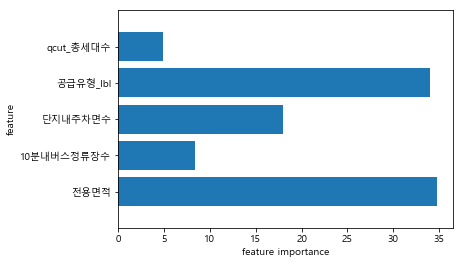

In [44]:
imp = model.feature_importances_                   # feature의 중요도
n_features = X_train1.shape[1]
feature_names = sel
plt.barh(range(n_features) , imp, align='center')  # 그래프(가로 막대 그래프)
plt.yticks(np.arange(n_features), feature_names)   # y축 값 지정
plt.xlabel("feature importance")
plt.ylabel("feature")
plt.ylim(-1, n_features)

In [38]:
 all_df.isna().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금         749
임대료           749
10분내지하철수      249
10분내버스정류장수      0
단지내주차면수         0
단지코드_Type       0
임대건물구분_lbl      0
지역_lbl          0
공급유형_lbl        0
자격유형_lbl        0
단지코드_lbl        0
qcut_총세대수       0
dtype: int64

In [41]:
all_df[all_df['임대건물구분'] == '상가']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
80,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,1.0,2,5,4,4,294,1
81,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,1.0,2,5,4,4,294,1
82,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,1.0,2,5,4,4,294,1
83,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,NaN,NaN,0.0,4.0,117.0,1.0,2,5,4,4,294,1
93,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,NaN,NaN,NaN,2.0,97.0,3.0,2,7,4,4,278,1
94,C1874,619,상가,충청남도,임대상가,17.40,1,2.0,D,NaN,NaN,NaN,2.0,97.0,3.0,2,7,4,4,278,1
95,C1874,619,상가,충청남도,임대상가,17.40,1,2.0,D,NaN,NaN,NaN,2.0,97.0,3.0,2,7,4,4,278,1
96,C1874,619,상가,충청남도,임대상가,22.89,1,2.0,D,NaN,NaN,NaN,2.0,97.0,3.0,2,7,4,4,278,1
97,C1874,619,상가,충청남도,임대상가,23.13,1,2.0,D,NaN,NaN,NaN,2.0,97.0,3.0,2,7,4,4,278,1
98,C1874,619,상가,충청남도,임대상가,23.13,1,2.0,D,NaN,NaN,NaN,2.0,97.0,3.0,2,7,4,4,278,1


In [42]:
all_df[all_df['임대건물구분'] == '상가'].isna().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금         739
임대료           739
10분내지하철수      149
10분내버스정류장수      0
단지내주차면수         0
단지코드_Type       0
임대건물구분_lbl      0
지역_lbl          0
공급유형_lbl        0
자격유형_lbl        0
단지코드_lbl        0
qcut_총세대수       0
dtype: int64

In [43]:
null_df[null_df['임대건물구분'] == '아파트']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
2309,C1350,1401,아파트,대전광역시,공공분양,74.94,317,2.0,D,NaN,NaN,NaN,6.0,1636.0,3.0,1,2,8,4,117,4
2310,C1350,1401,아파트,대전광역시,공공분양,74.94,137,2.0,D,NaN,NaN,NaN,6.0,1636.0,3.0,1,2,8,4,117,4
2311,C1350,1401,아파트,대전광역시,공공분양,74.94,22,2.0,D,NaN,NaN,NaN,6.0,1636.0,3.0,1,2,8,4,117,4
2312,C1350,1401,아파트,대전광역시,공공분양,84.94,164,2.0,D,NaN,NaN,NaN,6.0,1636.0,3.0,1,2,8,4,117,4
2313,C1350,1401,아파트,대전광역시,공공분양,84.94,19,2.0,D,NaN,NaN,NaN,6.0,1636.0,3.0,1,2,8,4,117,4
2314,C1350,1401,아파트,대전광역시,공공분양,84.96,26,2.0,D,NaN,NaN,NaN,6.0,1636.0,3.0,1,2,8,4,117,4
2315,C1350,1401,아파트,대전광역시,공공분양,84.97,26,2.0,D,NaN,NaN,NaN,6.0,1636.0,3.0,1,2,8,4,117,4
2972,C1006,1505,아파트,대전광역시,영구임대,26.37,10,27.0,D,NaN,NaN,2.0,5.0,428.0,3.0,1,2,3,4,4,4
2973,C1006,1505,아파트,대전광역시,영구임대,26.37,10,27.0,D,NaN,NaN,2.0,5.0,428.0,3.0,1,2,3,4,4,4
2975,C1006,1505,아파트,대전광역시,영구임대,52.74,6,27.0,D,NaN,NaN,2.0,5.0,428.0,3.0,1,2,3,4,4,4


In [44]:
grouped = all_df.groupby(['임대건물구분', '지역'])

In [45]:
group = grouped.get_group(('아파트', '대전광역시'))
group

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
7,C1407,1216,아파트,대전광역시,국민임대,30.95,288,13.0,A,15620000,127350,1.0,1.0,1285.0,3.0,1,2,1,1,131,3
8,C1407,1216,아파트,대전광역시,국민임대,30.99,68,13.0,A,15620000,127350,1.0,1.0,1285.0,3.0,1,2,1,1,131,3
9,C1407,1216,아파트,대전광역시,국민임대,30.99,34,13.0,A,15620000,127350,1.0,1.0,1285.0,3.0,1,2,1,1,131,3
10,C1407,1216,아파트,대전광역시,국민임대,41.11,148,13.0,A,27637000,164610,1.0,1.0,1285.0,3.0,1,2,1,1,131,3
11,C1407,1216,아파트,대전광역시,국민임대,41.39,74,13.0,A,27637000,164610,1.0,1.0,1285.0,3.0,1,2,1,1,131,3
12,C1407,1216,아파트,대전광역시,국민임대,41.58,70,13.0,A,27637000,164610,1.0,1.0,1285.0,3.0,1,2,1,1,131,3
13,C1407,1216,아파트,대전광역시,국민임대,41.58,70,13.0,A,27637000,164610,1.0,1.0,1285.0,3.0,1,2,1,1,131,3
14,C1407,1216,아파트,대전광역시,국민임대,46.36,170,13.0,A,36048000,198250,1.0,1.0,1285.0,3.0,1,2,1,1,131,3
15,C1407,1216,아파트,대전광역시,국민임대,46.36,170,13.0,A,36048000,198250,1.0,1.0,1285.0,3.0,1,2,1,1,131,3
16,C1407,1216,아파트,대전광역시,국민임대,51.24,62,13.0,A,42056000,253520,1.0,1.0,1285.0,3.0,1,2,1,1,131,3


In [46]:
grouped2 = all_df.groupby(['임대건물구분', '지역', '공급유형'])

In [47]:
group2 = grouped2.get_group(('아파트', '대전광역시', '영구임대'))
group2

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
145,C2621,1396,아파트,대전광역시,영구임대,26.37,890,26.0,C,5787000,79980,1.0,4.0,277.0,3.0,1,2,3,3,538,4
146,C2621,1396,아파트,대전광역시,영구임대,26.37,141,26.0,C,5787000,79980,1.0,4.0,277.0,3.0,1,2,3,3,538,4
147,C2621,1396,아파트,대전광역시,영구임대,26.37,20,26.0,C,5787000,79980,1.0,4.0,277.0,3.0,1,2,3,3,538,4
148,C2621,1396,아파트,대전광역시,영구임대,26.37,20,26.0,C,5787000,79980,1.0,4.0,277.0,3.0,1,2,3,3,538,4
149,C2621,1396,아파트,대전광역시,영구임대,31.32,298,26.0,C,6873000,94990,1.0,4.0,277.0,3.0,1,2,3,3,538,4
150,C2621,1396,아파트,대전광역시,영구임대,52.74,9,26.0,C,11574000,159960,1.0,4.0,277.0,3.0,1,2,3,3,538,4
151,C2621,1396,아파트,대전광역시,영구임대,52.74,4,26.0,C,11574000,159960,1.0,4.0,277.0,3.0,1,2,3,3,538,4
152,C2621,1396,아파트,대전광역시,영구임대,52.74,4,26.0,C,11574000,159960,1.0,4.0,277.0,3.0,1,2,3,3,538,4
168,C1616,1507,아파트,대전광역시,영구임대,26.37,588,1.0,C,5787000,79980,NaN,2.0,407.0,3.0,1,2,3,3,182,4
169,C1616,1507,아파트,대전광역시,영구임대,31.32,450,1.0,C,6873000,94990,NaN,2.0,407.0,3.0,1,2,3,3,182,4


In [48]:
all_df['자격유형'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O'], dtype=object)

In [49]:
all_df[ all_df['자격유형'] == 'D' ]['공급유형'].unique()

array(['임대상가', '공공분양', '영구임대'], dtype=object)

In [50]:
check = all_df[all_df['임대보증금'].isna()].index == all_df[ all_df['자격유형'] == 'D' ].index

cnt = 0
for i in check :
    if i == False :
        cnt += 1
    
if cnt == 0 :
    print('동일한 DataFrame 입니다.')
else : 
    print(f'False 횟수 : {cnt}')

동일한 DataFrame 입니다.


In [51]:
null_df[ null_df['공급유형'] == '공공분양' ]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
2309,C1350,1401,아파트,대전광역시,공공분양,74.94,317,2.0,D,NaN,NaN,NaN,6.0,1636.0,3.0,1,2,8,4,117,4
2310,C1350,1401,아파트,대전광역시,공공분양,74.94,137,2.0,D,NaN,NaN,NaN,6.0,1636.0,3.0,1,2,8,4,117,4
2311,C1350,1401,아파트,대전광역시,공공분양,74.94,22,2.0,D,NaN,NaN,NaN,6.0,1636.0,3.0,1,2,8,4,117,4
2312,C1350,1401,아파트,대전광역시,공공분양,84.94,164,2.0,D,NaN,NaN,NaN,6.0,1636.0,3.0,1,2,8,4,117,4
2313,C1350,1401,아파트,대전광역시,공공분양,84.94,19,2.0,D,NaN,NaN,NaN,6.0,1636.0,3.0,1,2,8,4,117,4
2314,C1350,1401,아파트,대전광역시,공공분양,84.96,26,2.0,D,NaN,NaN,NaN,6.0,1636.0,3.0,1,2,8,4,117,4
2315,C1350,1401,아파트,대전광역시,공공분양,84.97,26,2.0,D,NaN,NaN,NaN,6.0,1636.0,3.0,1,2,8,4,117,4


- 임대보증금과 임대료의 NaN 행은 같다
- 자격유형 'D' 의 임대보증금 및 임대료는 모두 NaN이다

In [52]:
null_df[ null_df['단지코드'] == 'C1350' ]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
2309,C1350,1401,아파트,대전광역시,공공분양,74.94,317,2.0,D,NaN,NaN,NaN,6.0,1636.0,3.0,1,2,8,4,117,4
2310,C1350,1401,아파트,대전광역시,공공분양,74.94,137,2.0,D,NaN,NaN,NaN,6.0,1636.0,3.0,1,2,8,4,117,4
2311,C1350,1401,아파트,대전광역시,공공분양,74.94,22,2.0,D,NaN,NaN,NaN,6.0,1636.0,3.0,1,2,8,4,117,4
2312,C1350,1401,아파트,대전광역시,공공분양,84.94,164,2.0,D,NaN,NaN,NaN,6.0,1636.0,3.0,1,2,8,4,117,4
2313,C1350,1401,아파트,대전광역시,공공분양,84.94,19,2.0,D,NaN,NaN,NaN,6.0,1636.0,3.0,1,2,8,4,117,4
2314,C1350,1401,아파트,대전광역시,공공분양,84.96,26,2.0,D,NaN,NaN,NaN,6.0,1636.0,3.0,1,2,8,4,117,4
2315,C1350,1401,아파트,대전광역시,공공분양,84.97,26,2.0,D,NaN,NaN,NaN,6.0,1636.0,3.0,1,2,8,4,117,4


In [63]:
all_df[all_df['임대건물구분'] == '상가'].isna().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금         739
임대료           739
10분내지하철수      149
10분내버스정류장수      0
단지내주차면수         0
단지코드_Type       0
임대건물구분_lbl      0
지역_lbl          0
공급유형_lbl        0
자격유형_lbl        0
단지코드_lbl        0
qcut_총세대수       0
dtype: int64

In [28]:
all_df[all_df['임대건물구분'] == '상가']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
80,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,1.0,2,5,4,4,294,1
81,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,1.0,2,5,4,4,294,1
82,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,1.0,2,5,4,4,294,1
83,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,NaN,NaN,0.0,4.0,117.0,1.0,2,5,4,4,294,1
93,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,NaN,NaN,0.0,2.0,97.0,3.0,2,7,4,4,278,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224,C1729,627,상가,강원도,임대상가,32.46,1,0.0,D,NaN,NaN,0.0,5.0,131.0,3.0,2,5,4,4,228,1
3225,C1729,627,상가,강원도,임대상가,34.86,1,0.0,D,NaN,NaN,0.0,5.0,131.0,3.0,2,5,4,4,228,1
3226,C1729,627,상가,강원도,임대상가,35.76,1,0.0,D,NaN,NaN,0.0,5.0,131.0,3.0,2,5,4,4,228,1
3227,C1729,627,상가,강원도,임대상가,50.08,1,0.0,D,NaN,NaN,0.0,5.0,131.0,3.0,2,5,4,4,228,1


In [64]:
aaaa = pd.read_csv('./data/age_gender_info.csv')

In [65]:
aaaa

,지역,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),50대(여자),50대(남자),60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,경상북도,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,0.072613,0.087149,0.072146,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
1,경상남도,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,0.067600,0.086873,0.072570,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
2,대전광역시,0.028197,0.029092,0.040490,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,0.067925,0.085751,0.068819,0.088468,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066
3,경기도,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067
4,전라북도,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,0.066645,0.081408,0.074382,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013
5,강원도,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,0.068002,0.087266,0.072177,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017
6,광주광역시,0.031994,0.034566,0.049851,0.050254,0.065084,0.066875,0.066888,0.064416,0.080028,0.079183,0.079902,0.067443,0.075930,0.059586,0.048552,0.031754,0.029749,0.010341,0.006343,0.000895,0.000353,0.000013
7,충청남도,0.031369,0.031711,0.059077,0.062422,0.067975,0.072622,0.065095,0.067303,0.078860,0.073418,0.079299,0.069167,0.070278,0.057692,0.042296,0.028682,0.024514,0.010900,0.005429,0.001549,0.000219,0.000123
8,부산광역시,0.022003,0.022947,0.032681,0.035512,0.053796,0.057233,0.047049,0.048866,0.061952,0.060769,0.082899,0.068855,0.109297,0.085294,0.078743,0.053388,0.047908,0.020228,0.008043,0.002240,0.000268,0.000028
9,제주특별자치도,0.034690,0.036695,0.060094,0.063080,0.069135,0.069667,0.050808,0.048026,0.080548,0.072530,0.088403,0.068930,0.074248,0.055717,0.047944,0.033054,0.026836,0.011332,0.006832,0.000982,0.000368,0.000082
